# Modules

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Variables

In [18]:
ds_EU27_emissions = '02.Transformed data/01.EU27_emissions.csv'
ds_EU27_passengers = '02.Transformed data/02.EU27_passengers.csv'
ds_EU27_emissions_proCapita = '02.Transformed data/03.EU27_emissions_proCapita.csv'

# Data load

In [19]:
df_EU27_emissions = pd.read_csv(ds_EU27_emissions,header=0, dtype='unicode')

In [20]:
cols = df_EU27_emissions.columns
for col in cols:
    if col != 'Year':
        df_EU27_emissions[col] = df_EU27_emissions[col].astype(float)

df_EU27_emissions['Year'] = df_EU27_emissions['Year'].astype("int")

In [21]:
df_EU27_emissions.head()

,Year,As,BC,CO,Cd,Cr,Cu,Hg,Indeno,NH3,...,rolling_Pb,rolling_SOx,rolling_Se,rolling_TSP,rolling_Zn,rolling_benzo(a),rolling_benzo(b),rolling_benzo(k),rolling_dioxin,rolling_total PAH
0,1990,0.001071,2.298696,514.841454,0.003707,0.044906,0.137487,0.013896,0.016692,0.772263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,0.000896,2.193775,453.177145,0.003175,0.044566,0.136758,0.013338,0.008351,0.757485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,0.000853,2.215153,518.329998,0.003330,0.048017,0.146645,0.013321,0.008160,0.816351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,0.001054,2.199278,620.187543,0.003154,0.049412,0.164067,0.013583,0.010088,0.859435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,0.001050,2.223296,535.043975,0.003470,0.052866,0.174008,0.013986,0.012146,0.893203,...,113.137431,17.319537,0.033363,4.618215,1.078894,0.006957,0.049501,0.006007,0.015186,0.074248


In [22]:
df_EU27_passengers = pd.read_csv(ds_EU27_passengers,header=0, dtype='unicode')

In [23]:
df_EU27_passengers['Year'] = df_EU27_passengers['Year'].astype("int")
df_EU27_passengers['Passengers'] = df_EU27_passengers['Passengers'].astype("int")

In [24]:
df_EU27_passengers.head()

,Year,Passengers
0,2013,746100398
1,2014,781202599
2,2015,819698948
3,2016,871695782
4,2017,938854476


In [25]:
df_EU27_emissions_proCapita = pd.read_csv(ds_EU27_emissions_proCapita,header=0, dtype='unicode')

In [26]:
cols = df_EU27_emissions_proCapita.columns
for col in cols:
    if col != 'Year':
        df_EU27_emissions_proCapita[col] = df_EU27_emissions_proCapita[col].astype(float)

df_EU27_emissions_proCapita['Year'] = df_EU27_emissions_proCapita['Year'].astype("int")

In [27]:
df_EU27_emissions_proCapita.head()

,Year,As,BC,CO,Cd,Cr,Cu,Hg,Indeno,NH3,...,rolling_Pb,rolling_SOx,rolling_Se,rolling_TSP,rolling_Zn,rolling_benzo(a),rolling_benzo(b),rolling_benzo(k),rolling_dioxin,rolling_total PAH
0,2013,0.000002,0.003802,0.488508,0.000008,0.000134,0.000422,0.000036,0.000029,0.002001,...,0.065092,0.039367,0.000105,0.009359,0.002649,0.000013,0.000100,0.000012,0.000025,0.000160
1,2014,0.000002,0.003699,0.482483,0.000008,0.000132,0.000419,0.000036,0.000028,0.001846,...,0.058656,0.037811,0.000100,0.008936,0.002517,0.000013,0.000098,0.000012,0.000024,0.000156
2,2015,0.000003,0.003631,0.483471,0.000008,0.000132,0.000415,0.000036,0.000027,0.001758,...,0.053573,0.036373,0.000096,0.008560,0.002420,0.000013,0.000096,0.000011,0.000024,0.000152
3,2016,0.000003,0.003628,0.527869,0.000008,0.000134,0.000414,0.000037,0.000027,0.001779,...,0.047795,0.034779,0.000090,0.008170,0.002341,0.000012,0.000093,0.000011,0.000023,0.000147
4,2017,0.000003,0.003667,0.522864,0.000008,0.000135,0.000404,0.000038,0.000027,0.001804,...,0.042303,0.033333,0.000086,0.007840,0.002337,0.000012,0.000092,0.000011,0.000021,0.000144


# Plotting

## Passengers

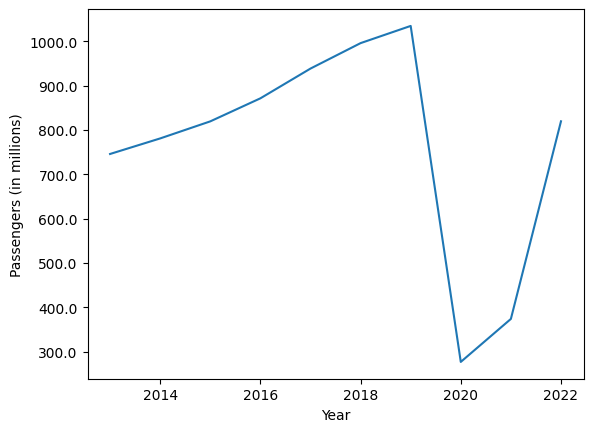

In [28]:
def millions_formatter(x, pos):
    return f'{x / 1000000}'

fig, ax = plt.subplots()
sns.lineplot(x = "Year", y = "Passengers", data=df_EU27_passengers)
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_ylabel('Passengers (in millions)')
plt.show()

## Emissions

### Correlations

In [29]:
df_EU27_emissions_CORR = df_EU27_emissions.corrwith(df_EU27_emissions['Year'])

In [30]:
pollutants = []

# Iterate over column names
for column in df_EU27_emissions:
    if column != 'Year':
        if 'rolling_' not in column:
            df_EU27_emissions['rolling_'+column] = df_EU27_emissions[column].rolling(5).mean()
            pollutants.append(column)

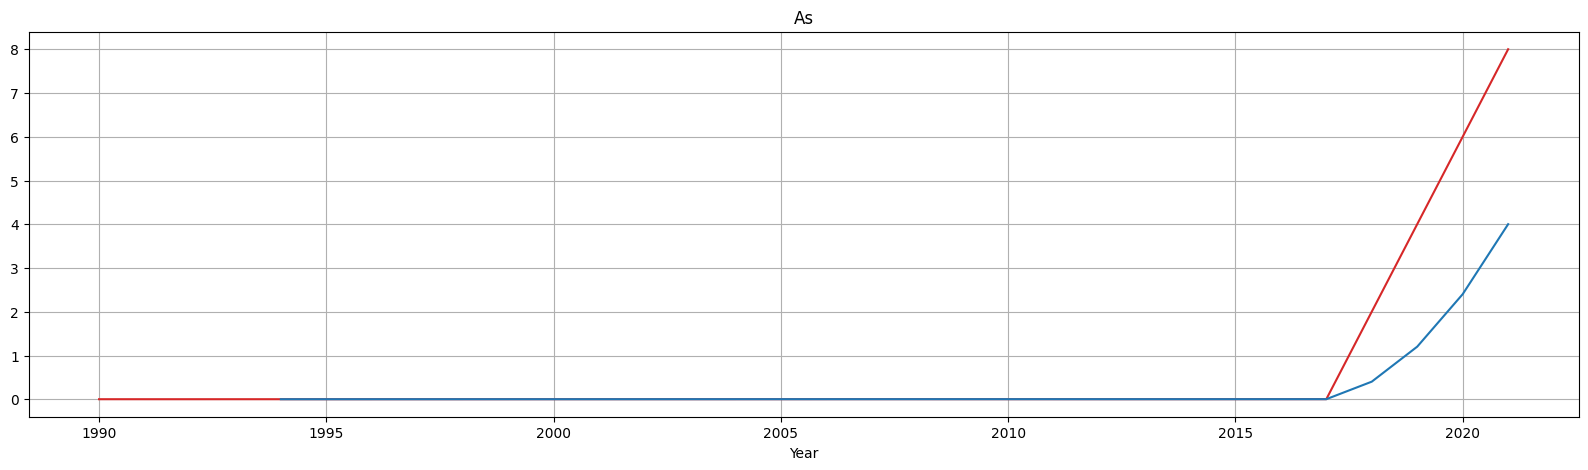

Correlation of punctual value is 0.535719994866854
Correlation of rolling average value is 0.5201836825103469


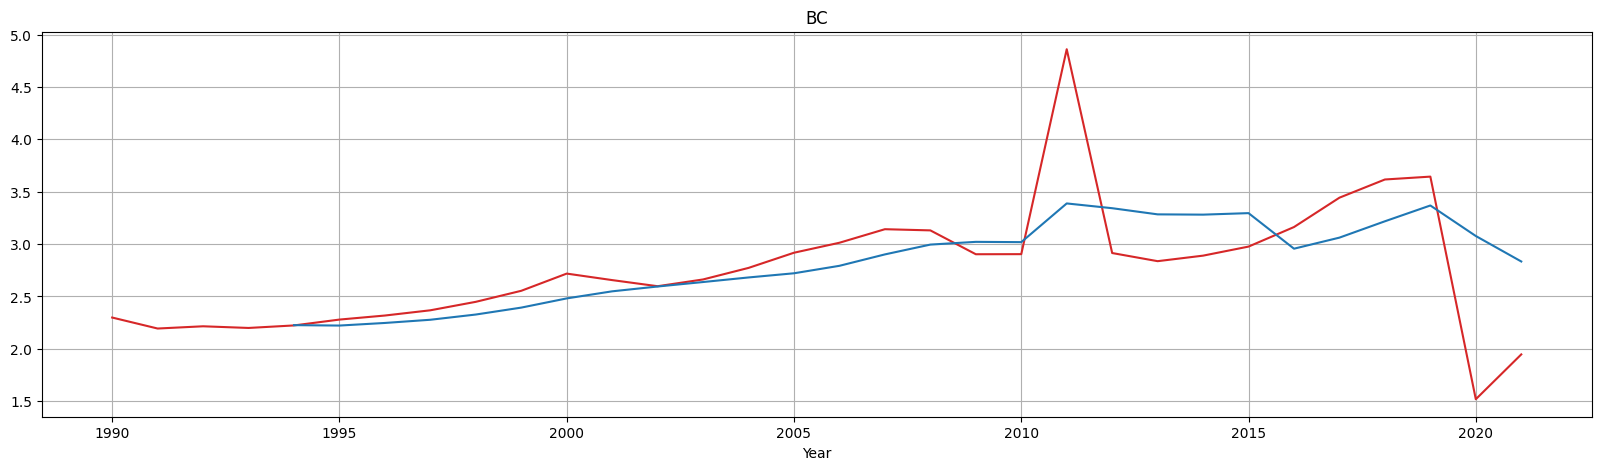

Correlation of punctual value is 0.4339667133492249
Correlation of rolling average value is 0.8727233474856503


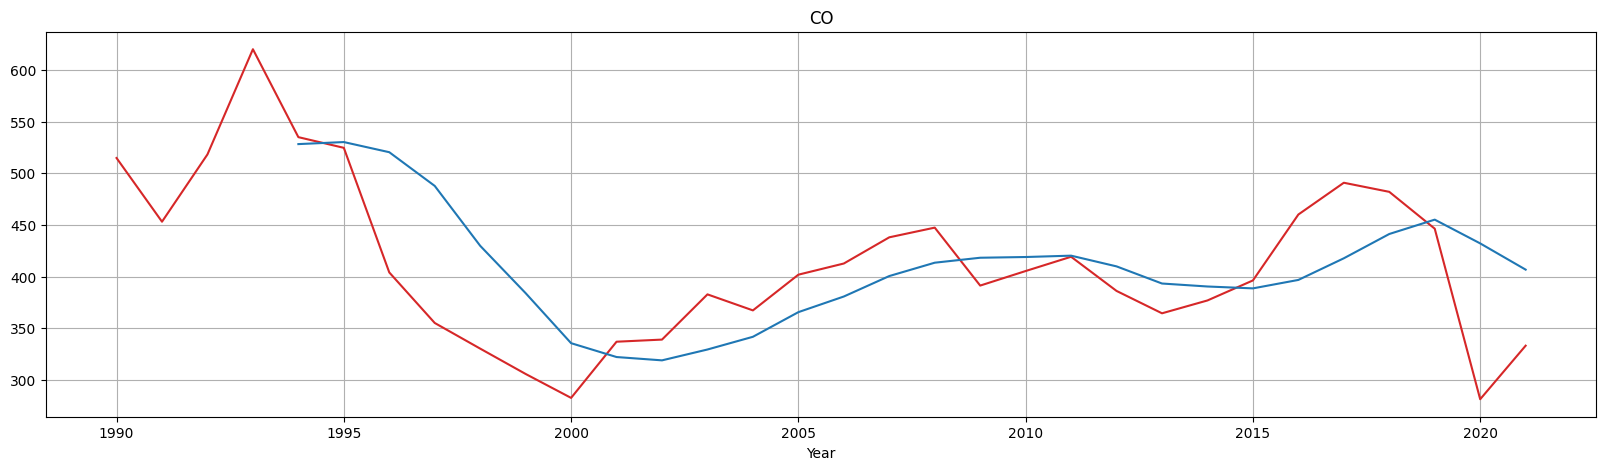

Correlation of punctual value is -0.2968744613286813
Correlation of rolling average value is -0.15948064284425373


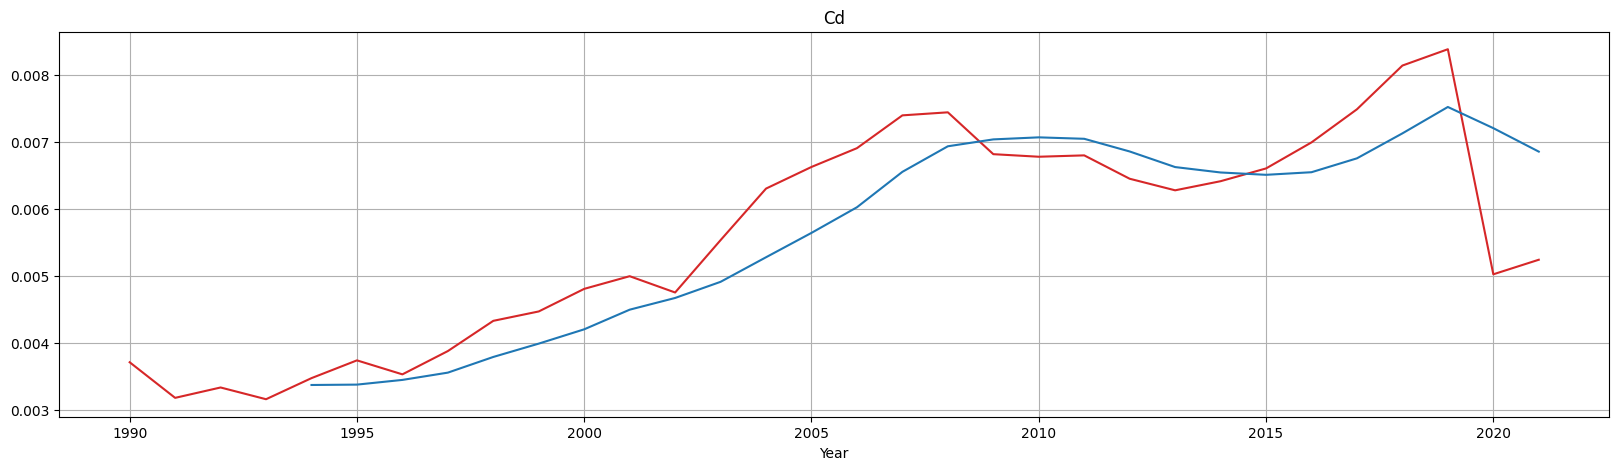

Correlation of punctual value is 0.8091795630349787
Correlation of rolling average value is 0.9188441600746368


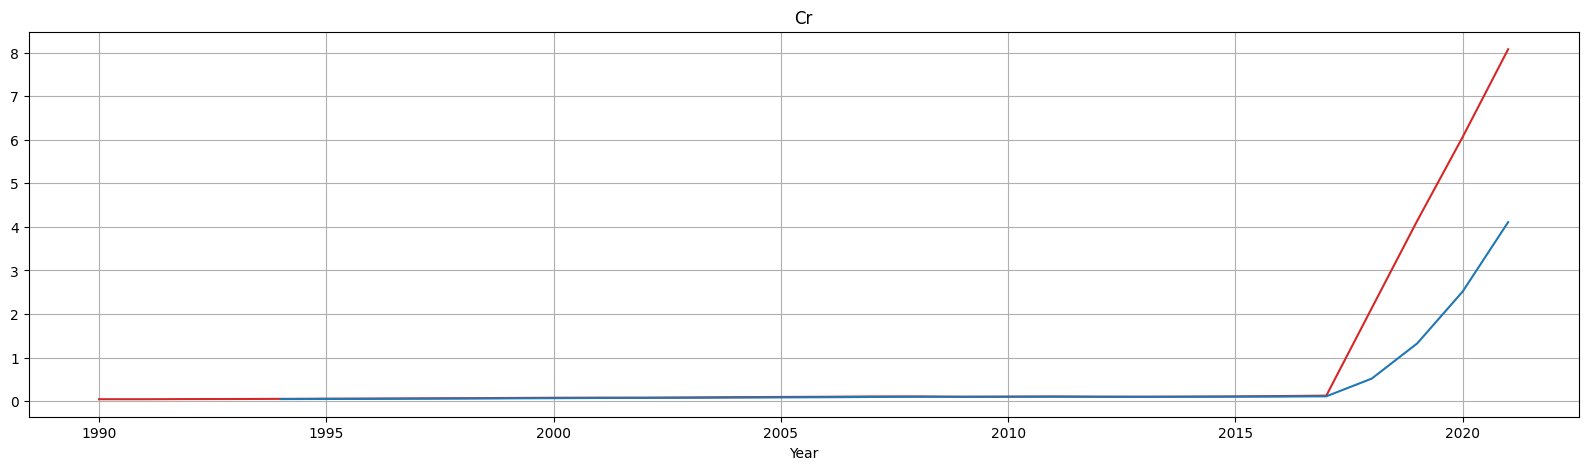

Correlation of punctual value is 0.5463996338152796
Correlation of rolling average value is 0.5390386545347086


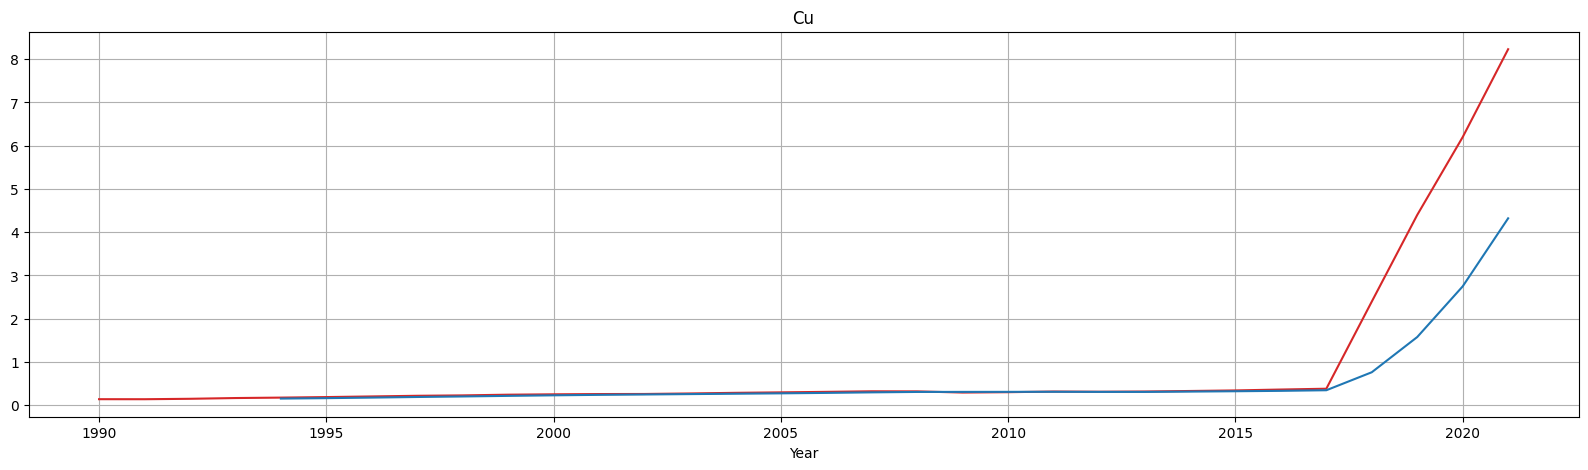

Correlation of punctual value is 0.566120729510821
Correlation of rolling average value is 0.5717535852425097


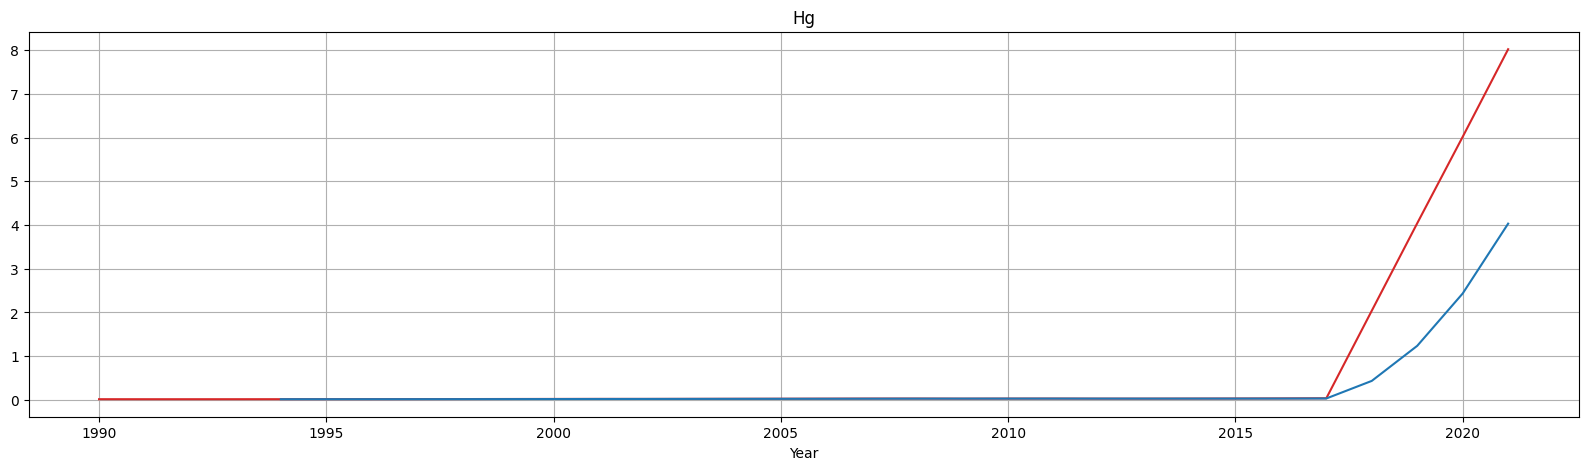

Correlation of punctual value is 0.5385122417118519
Correlation of rolling average value is 0.5252609107658703


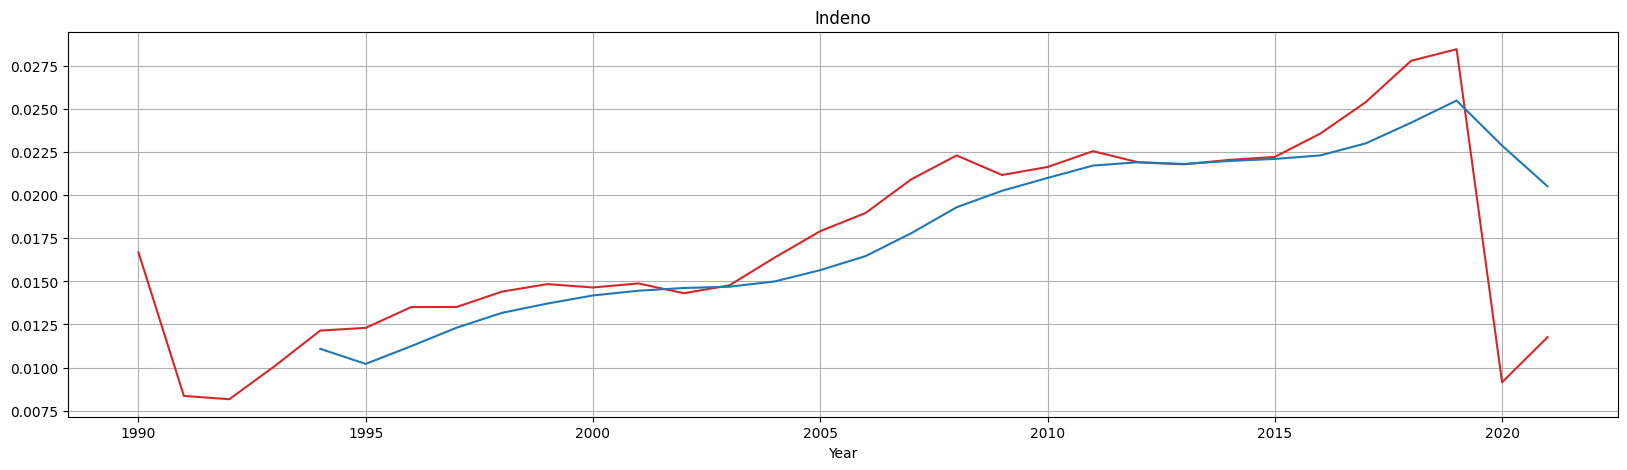

Correlation of punctual value is 0.6662810448568507
Correlation of rolling average value is 0.9577941004728352


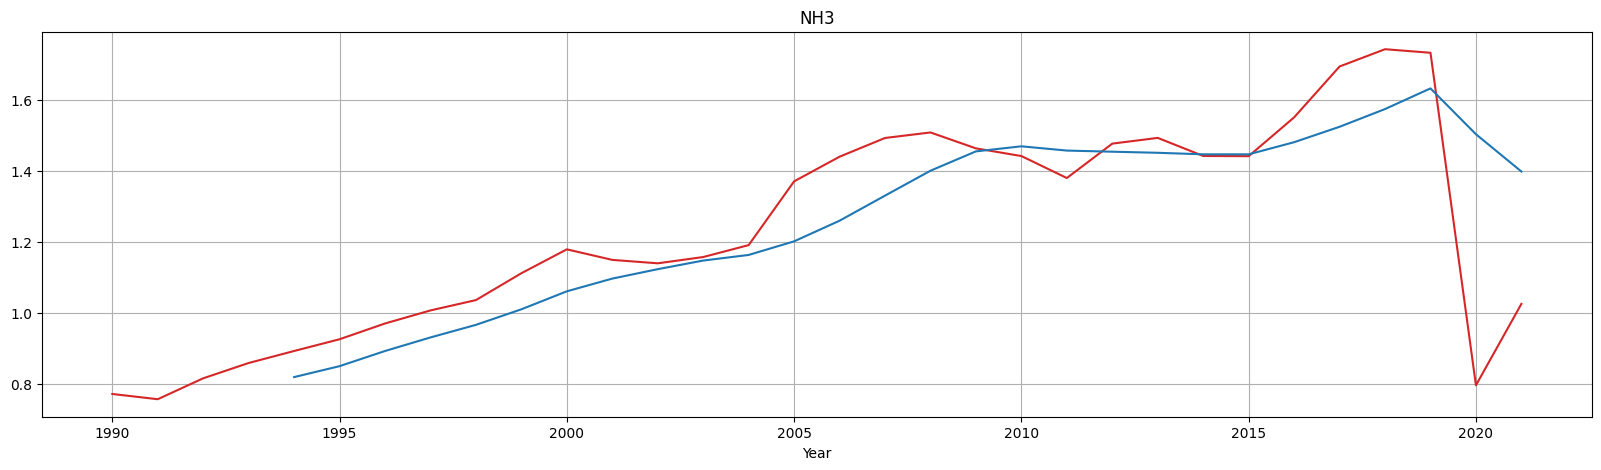

Correlation of punctual value is 0.7216874807280897
Correlation of rolling average value is 0.946063321792824


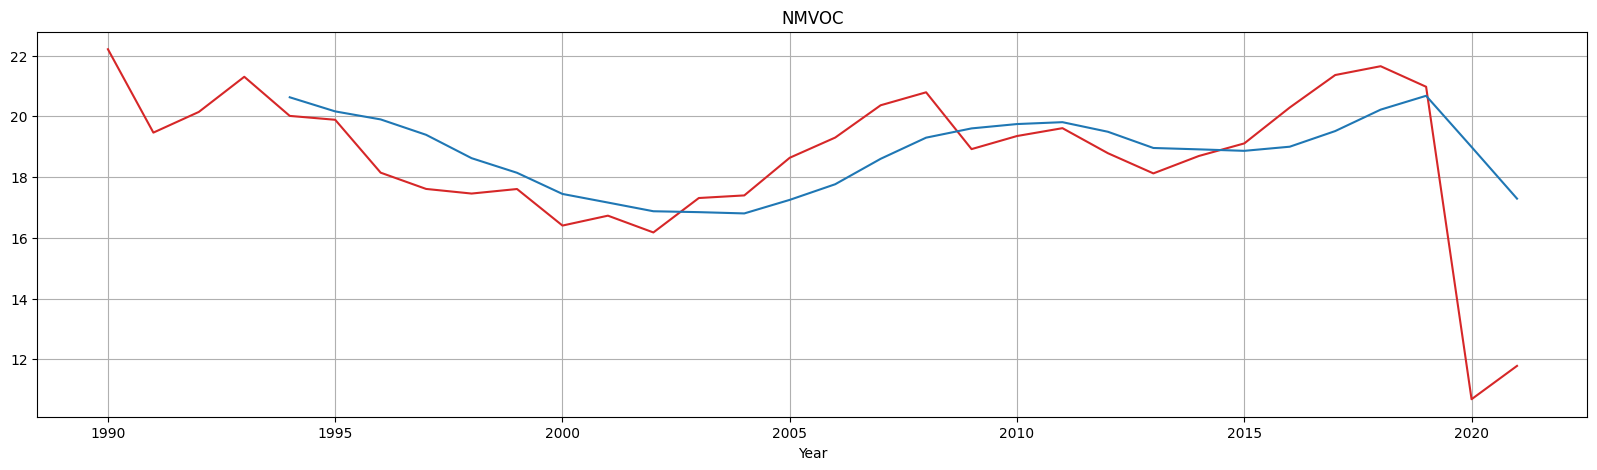

Correlation of punctual value is -0.2344349032597257
Correlation of rolling average value is 0.14709721736986917


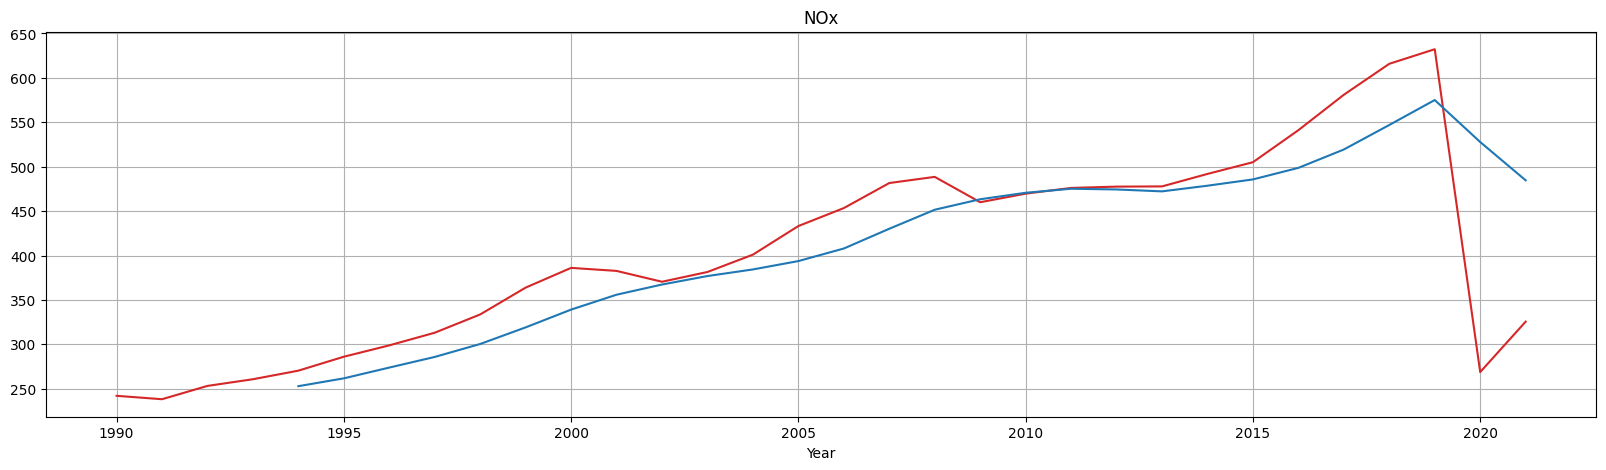

Correlation of punctual value is 0.7527392576457447
Correlation of rolling average value is 0.969350755037444


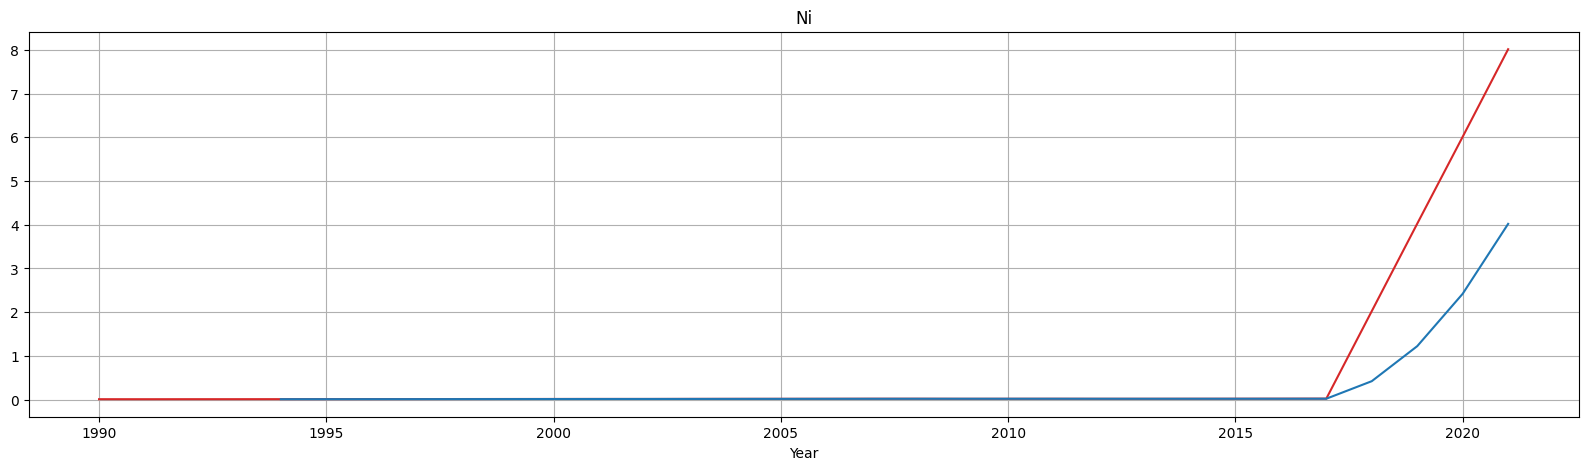

Correlation of punctual value is 0.5374042446314035
Correlation of rolling average value is 0.5232540992333792


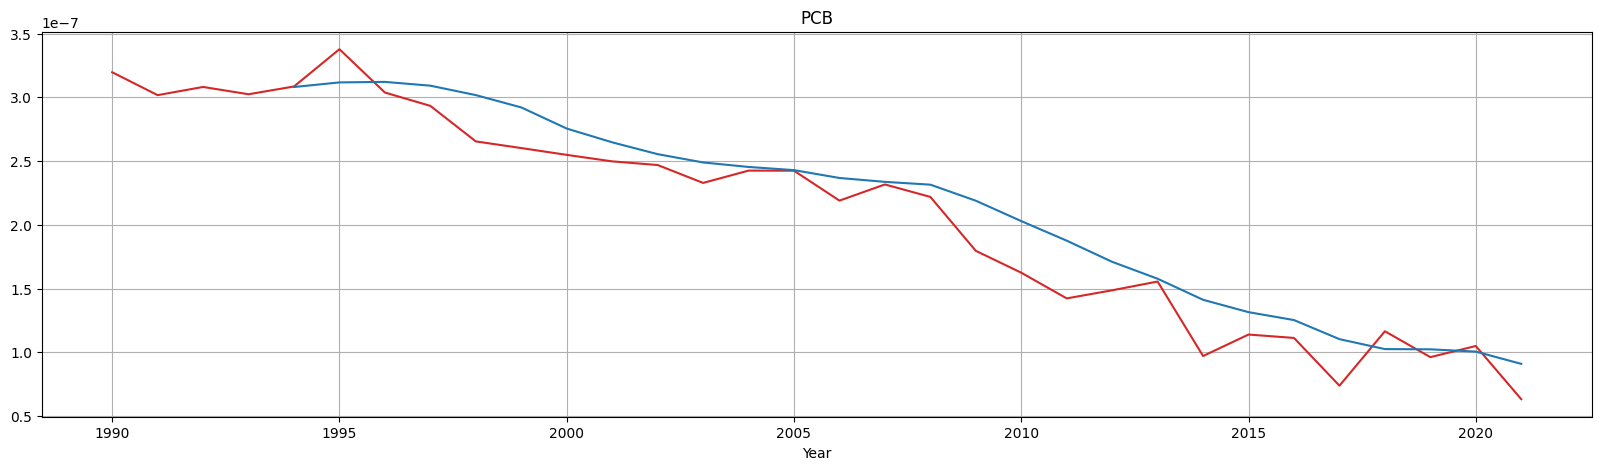

Correlation of punctual value is -0.9706878300743992
Correlation of rolling average value is -0.9880302018088353


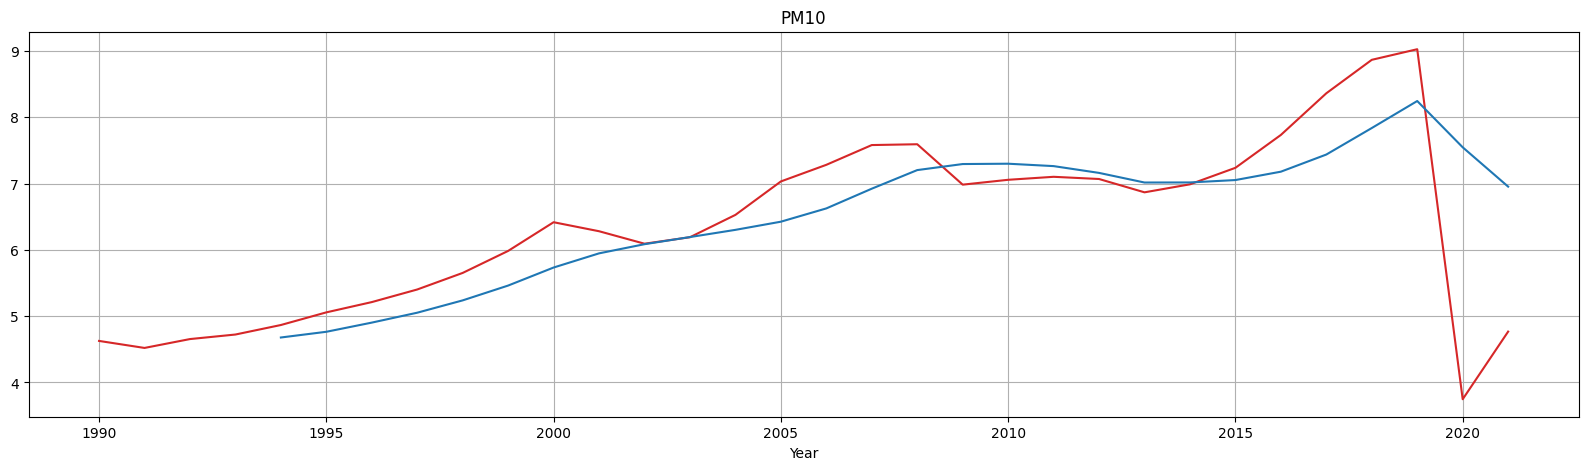

Correlation of punctual value is 0.6042600540848166
Correlation of rolling average value is 0.9232587490084962


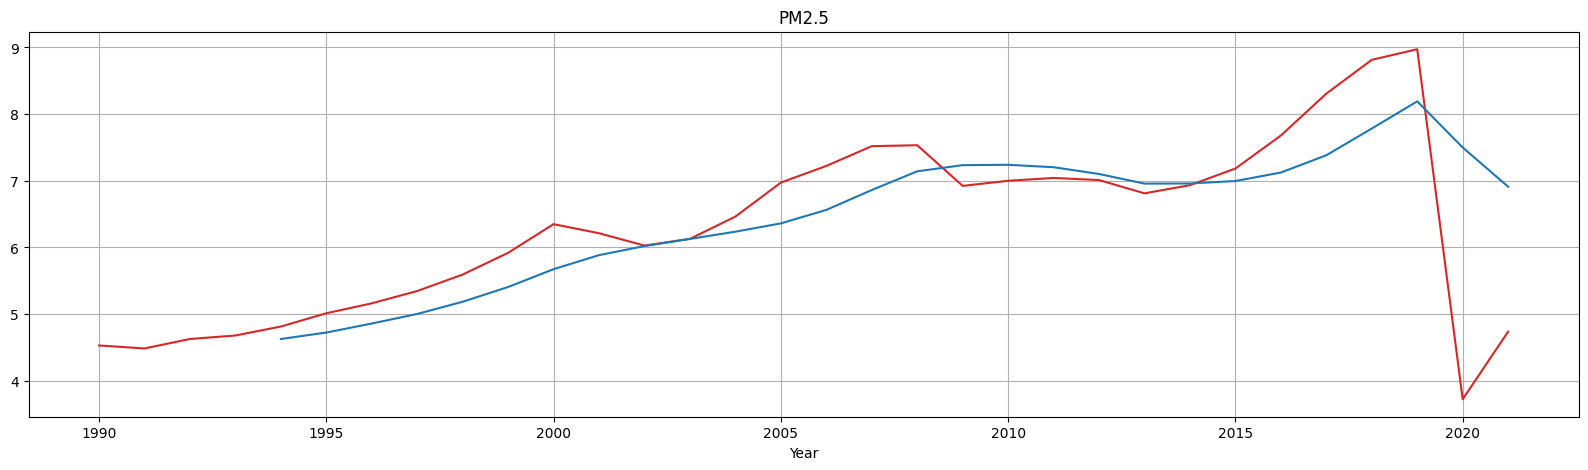

Correlation of punctual value is 0.608227554595619
Correlation of rolling average value is 0.9250148129300738


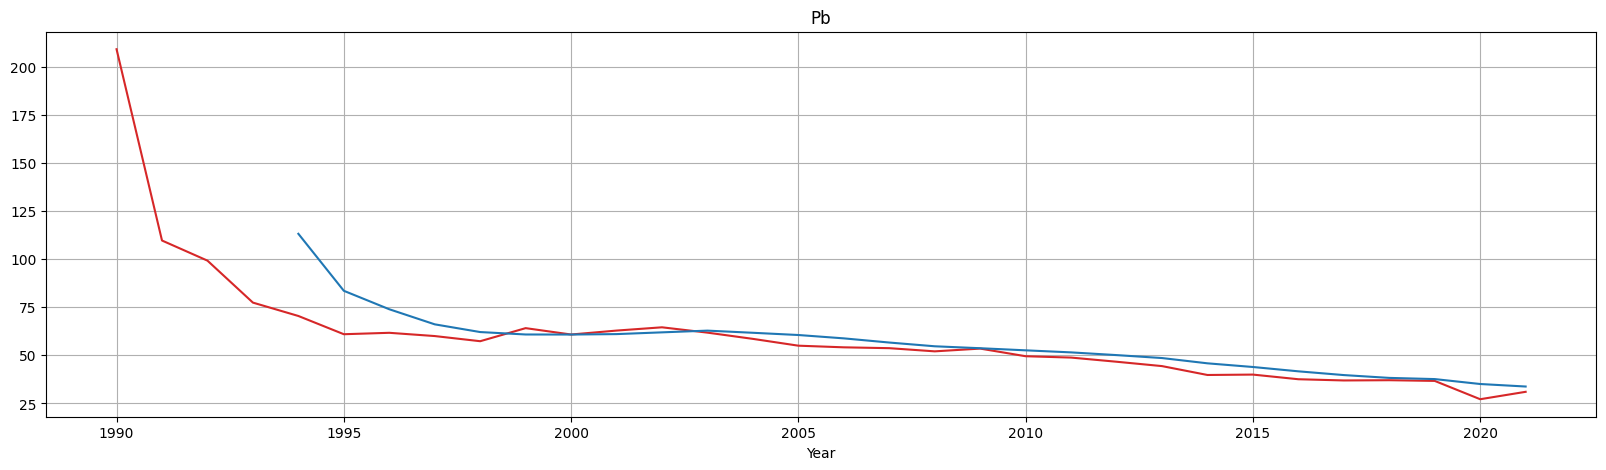

Correlation of punctual value is -0.7148702035883355
Correlation of rolling average value is -0.8816300015678561


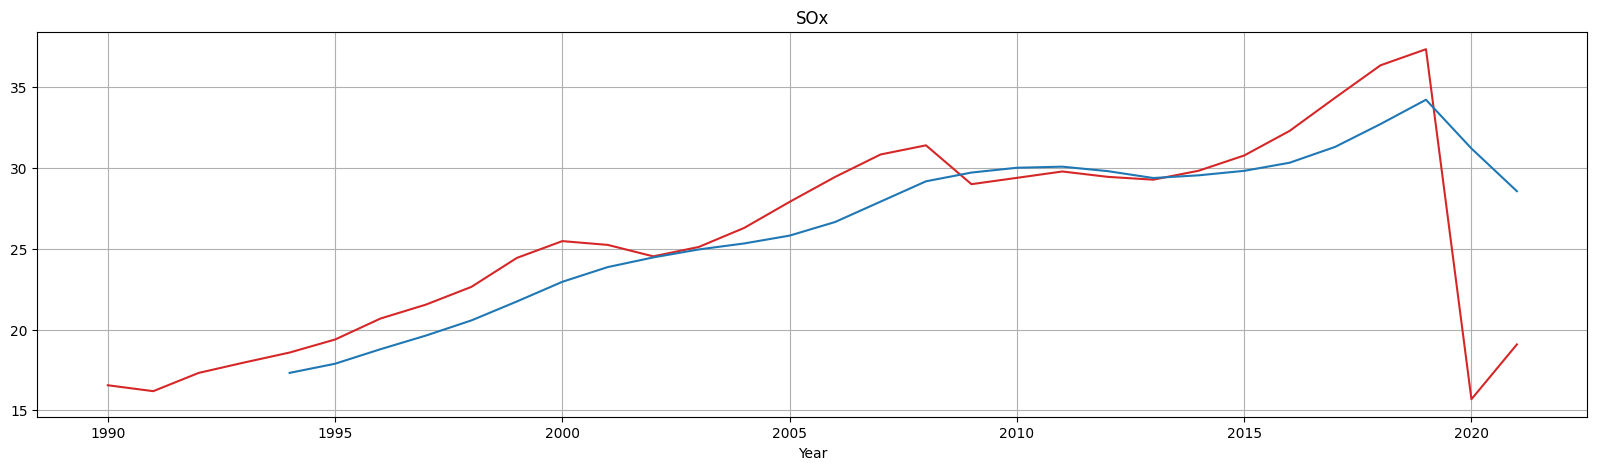

Correlation of punctual value is 0.6655277024950009
Correlation of rolling average value is 0.9359319696530224


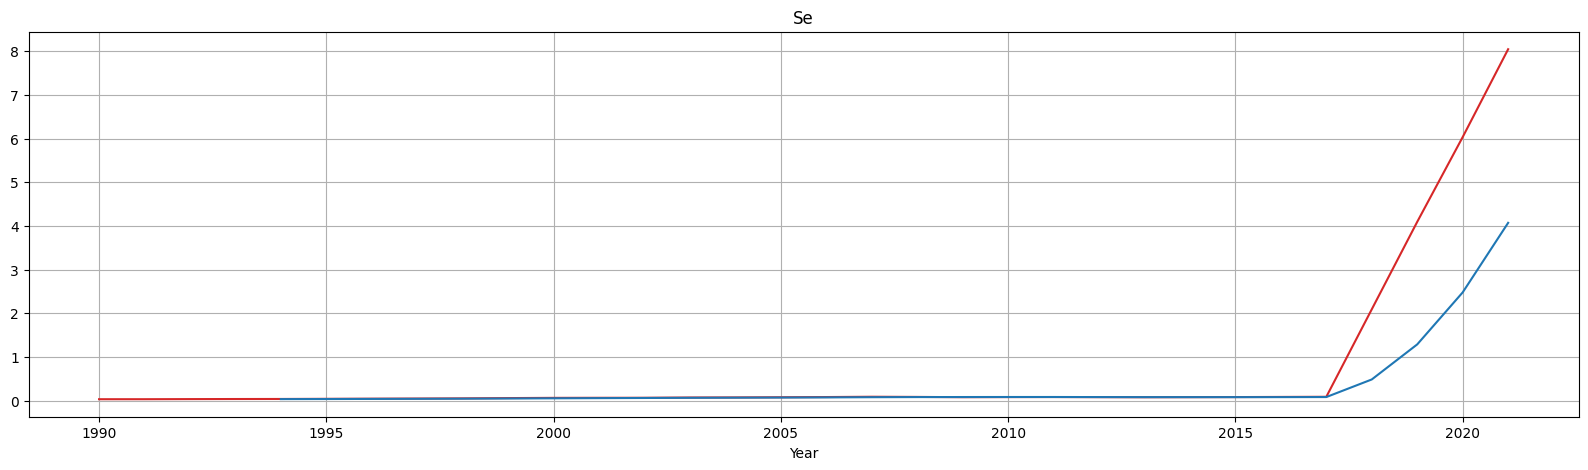

Correlation of punctual value is 0.5436976461101383
Correlation of rolling average value is 0.534736485473151


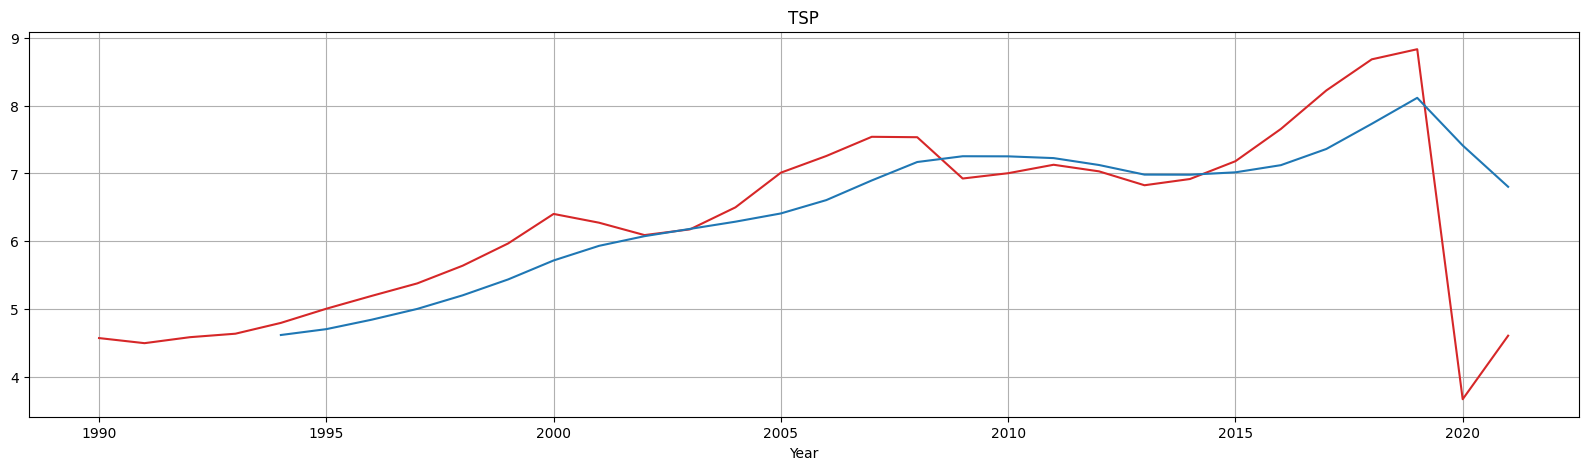

Correlation of punctual value is 0.5905567244705884
Correlation of rolling average value is 0.91329504078873


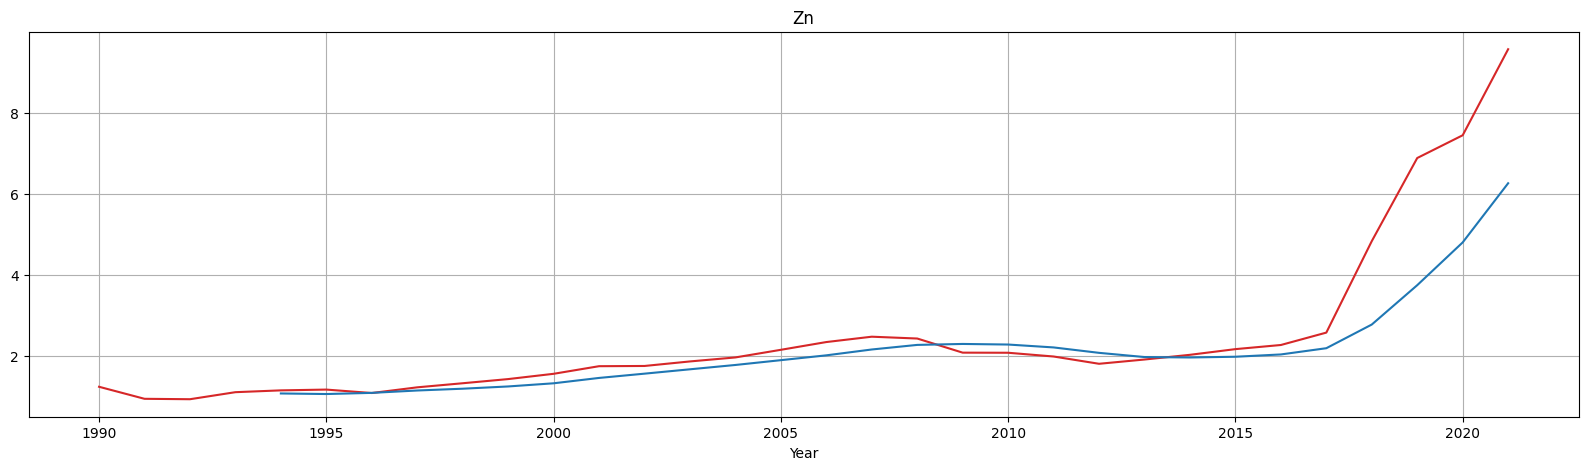

Correlation of punctual value is 0.7105851247967115
Correlation of rolling average value is 0.7724749686512282


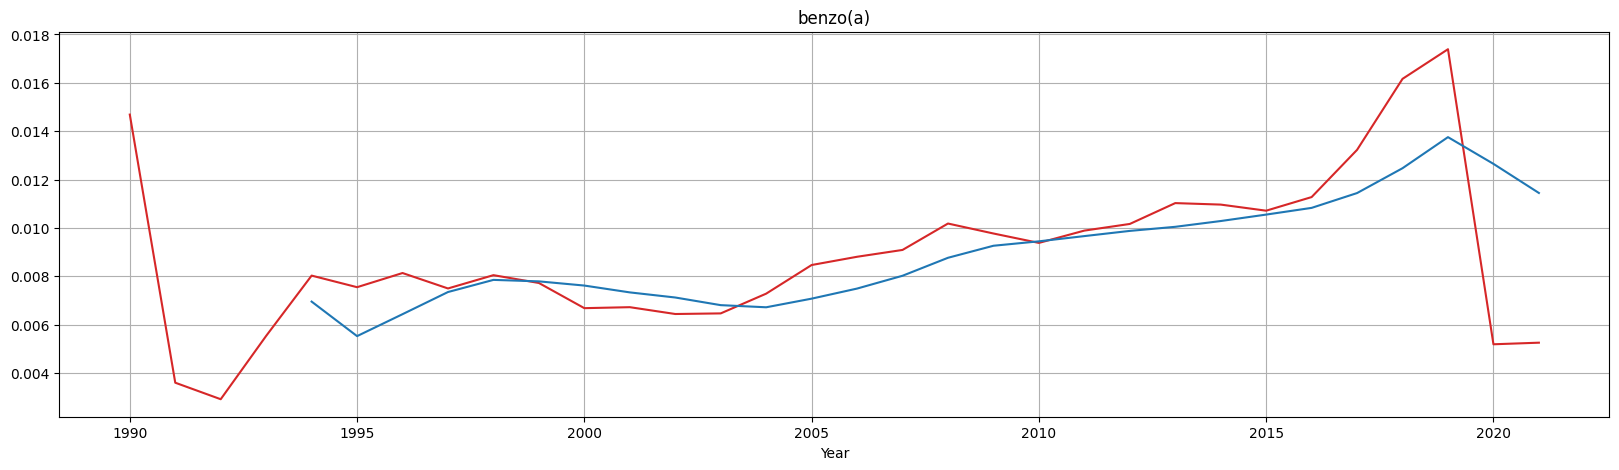

Correlation of punctual value is 0.4710287918054708
Correlation of rolling average value is 0.9223939387084303


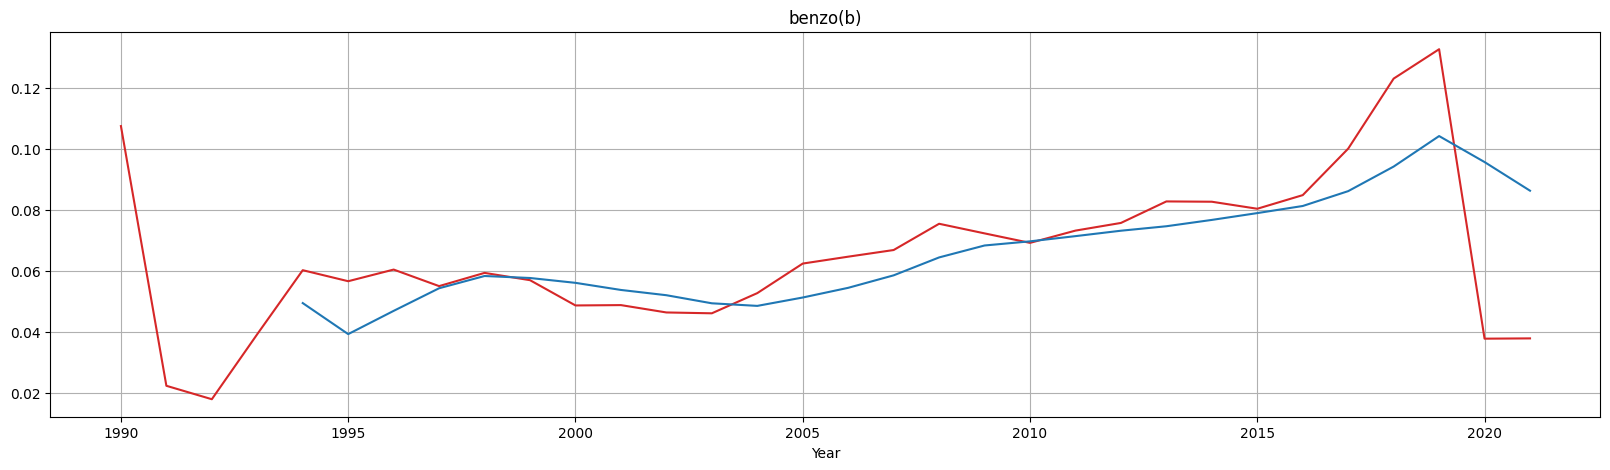

Correlation of punctual value is 0.485942225387475
Correlation of rolling average value is 0.9195034099036098


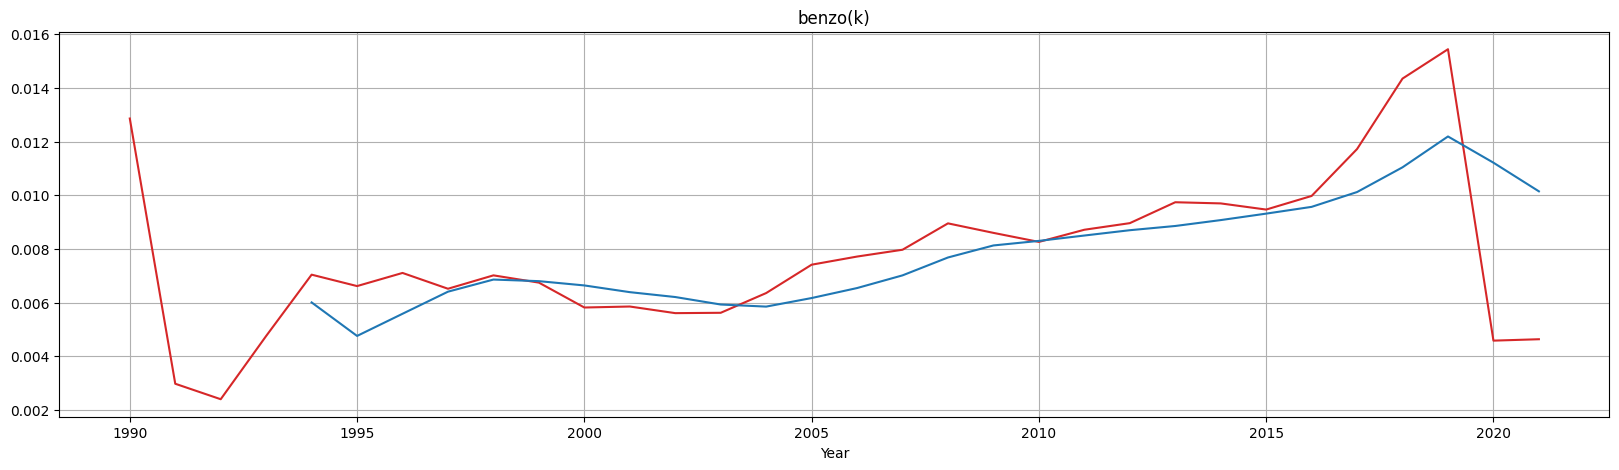

Correlation of punctual value is 0.4825547871326938
Correlation of rolling average value is 0.9241839961379267


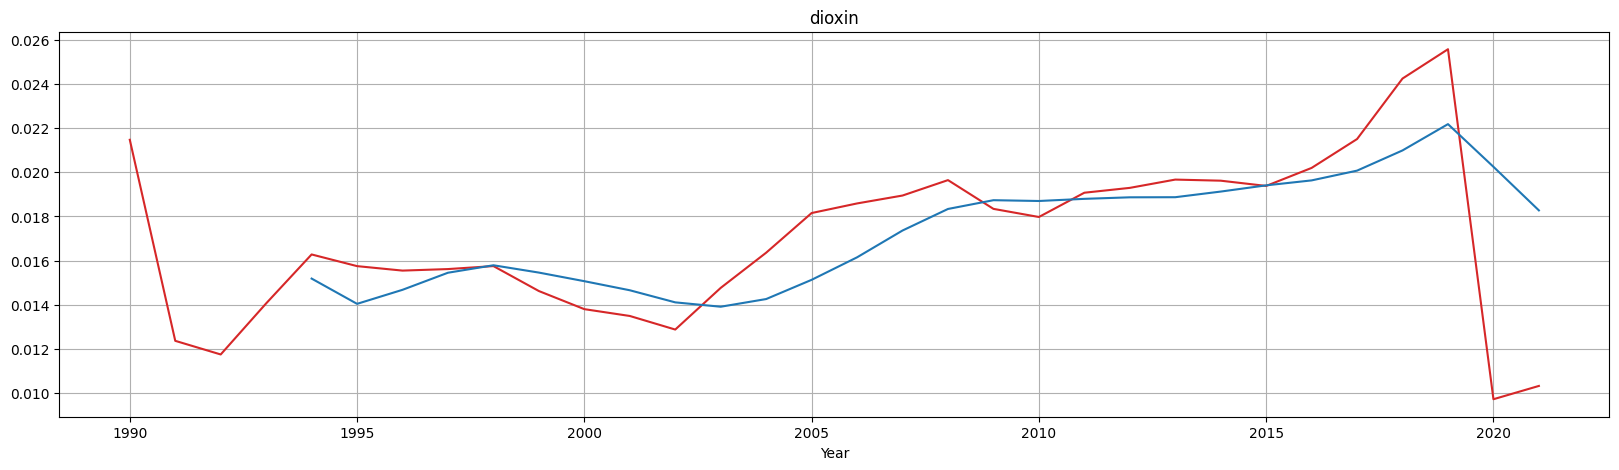

Correlation of punctual value is 0.38888464689991725
Correlation of rolling average value is 0.8857130894262771


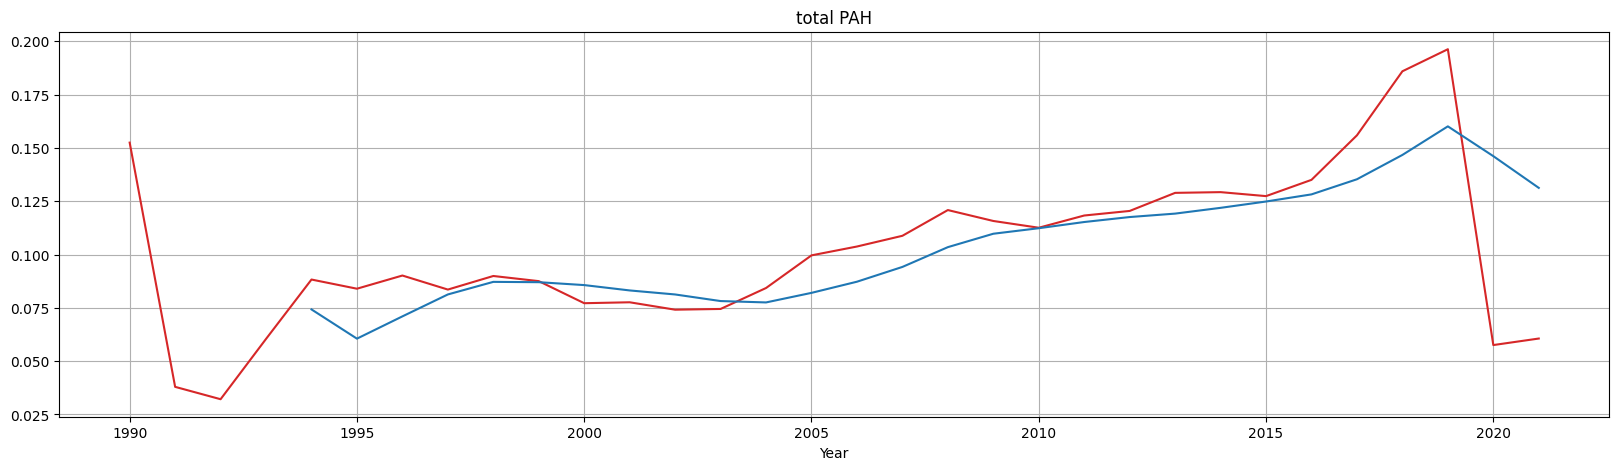

Correlation of punctual value is 0.533373787754153
Correlation of rolling average value is 0.941712045275388


In [31]:
for x in pollutants:
    fig, ax1 = plt.subplots(figsize=(20,5))
    plt.title(x) 

    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.plot(df_EU27_emissions['Year'], df_EU27_emissions[x],color=color) 
    
    
    color = 'tab:blue'
    ax1.plot(df_EU27_emissions['Year'], df_EU27_emissions['rolling_'+x],color=color) 
    
    plt.grid()
    plt.show() 
    print('Correlation of punctual value is {0}'.format(df_EU27_emissions_CORR[x]))
    print('Correlation of rolling average value is {0}'.format(df_EU27_emissions_CORR['rolling_'+x]))

### Correlation

In [32]:
df_EU27_emissions_CORR.head()

Year    1.000000
As      0.535720
BC      0.433967
CO     -0.296874
Cd      0.809180
dtype: float64

<Figure size 640x480 with 0 Axes>

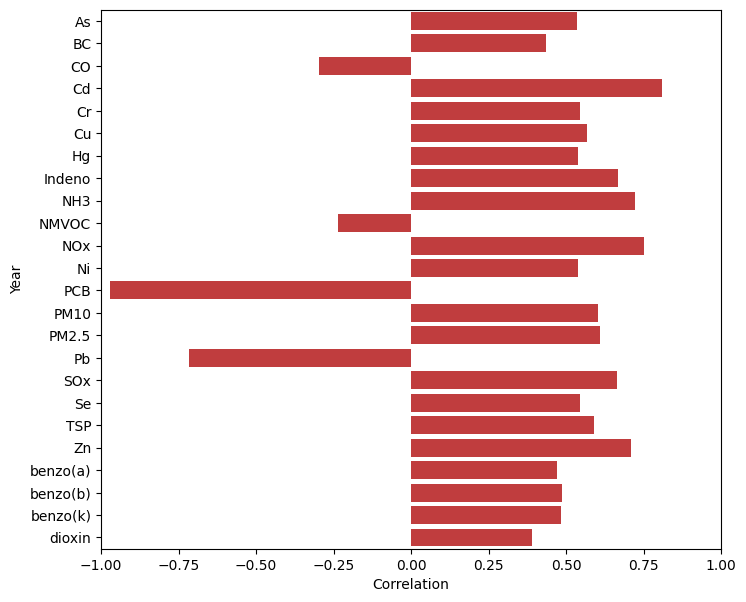

<Figure size 640x480 with 0 Axes>

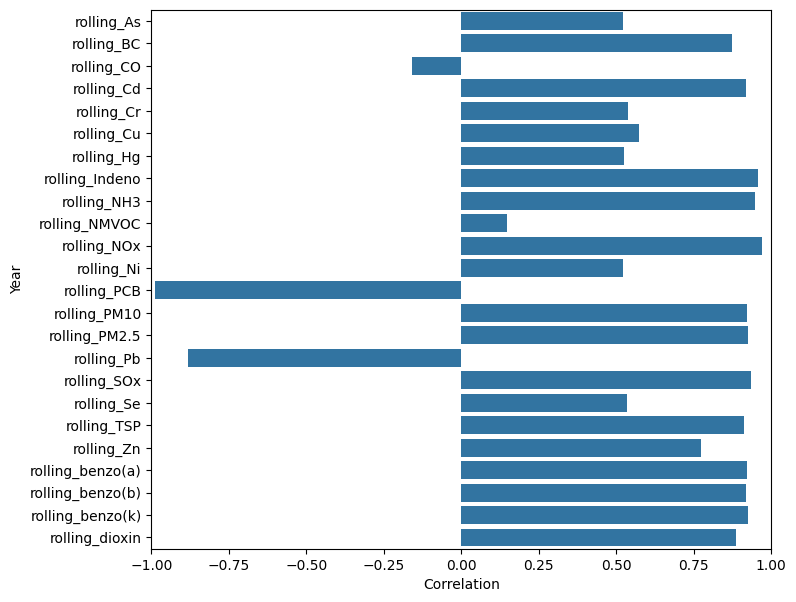

In [33]:
corr=df_EU27_emissions_CORR.to_frame()
corr.reset_index(inplace=True)
corr = corr.rename(columns={0: 'Correlation', 'index': 'Year'})
corr_A=corr[1:25]
corr_B=corr[26:50]

#set seaborn plotting aesthetics
#sns.set(style='white')

#create grouped bar chart
fig = plt.figure()
fig = plt.subplots(figsize=(8,7))
color = 'tab:red'
plt.xlim(-1, 1)
sns.barplot(x='Correlation', y='Year', data=corr_A, color=color) 
plt.show()

fig = plt.figure()
fig = plt.subplots(figsize=(8,7))
color = 'tab:blue'
plt.xlim(-1, 1)
sns.barplot(x='Correlation', y='Year', data=corr_B, color=color) 
plt.show()

## Emissions pro capita

In [ ]:
df_EU27_emissions_proCapita_CORR = df_EU27_emissions_proCapita.corrwith(df_EU27_emissions_proCapita['Year'])

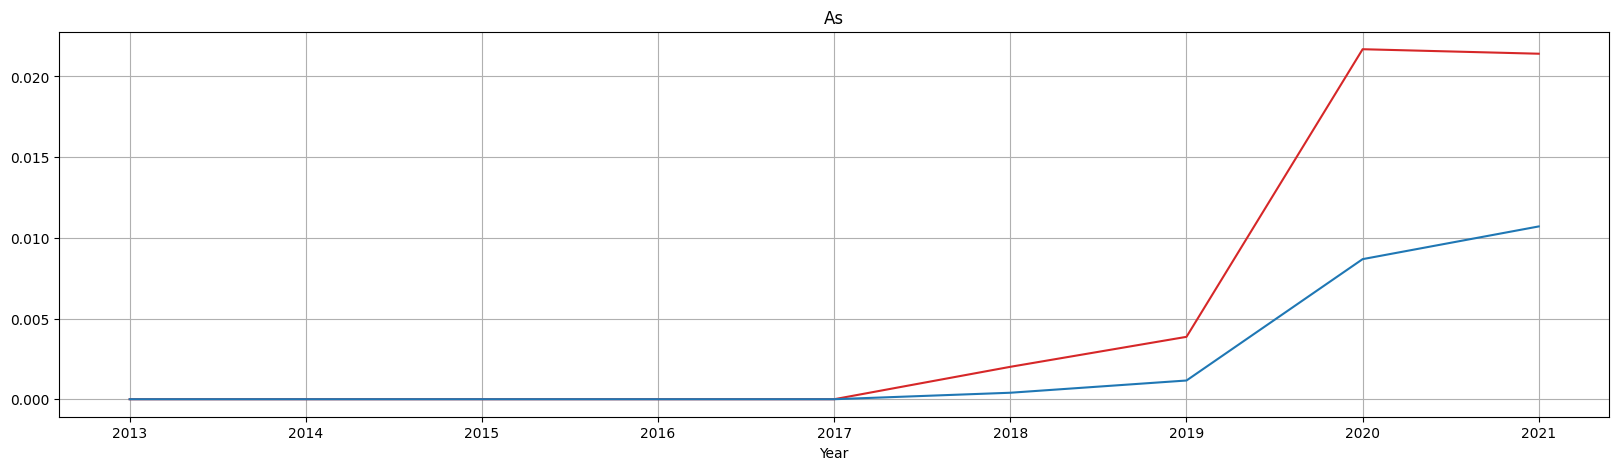

Correlation of punctual value is 0.535719994866854
Correlation of rolling average value is 0.5201836825103469


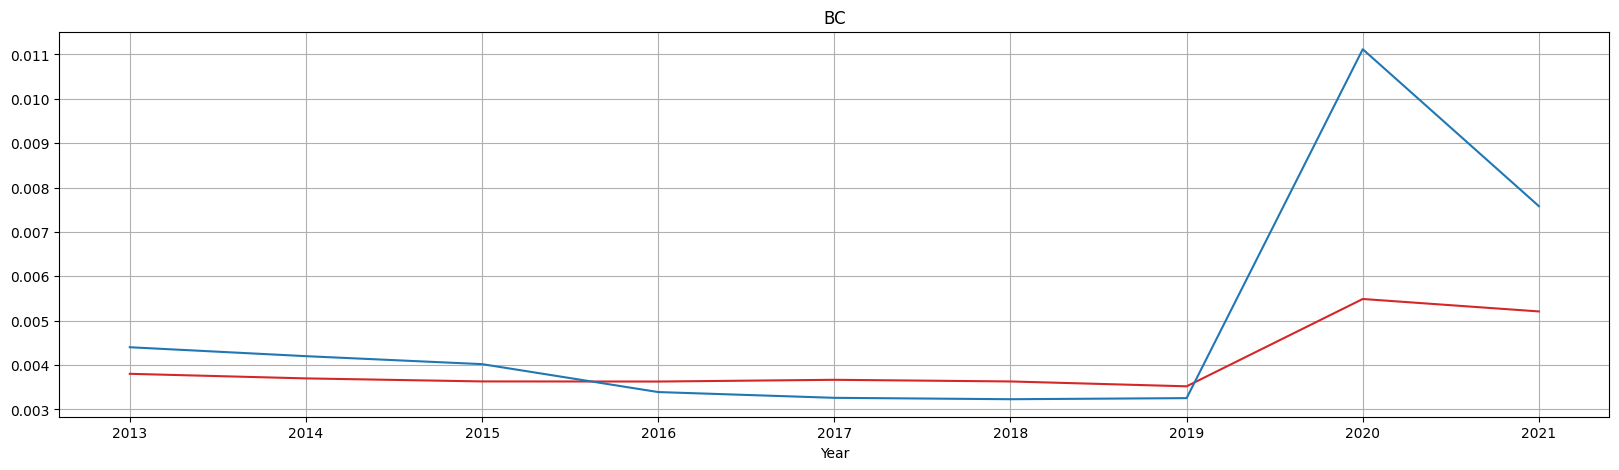

Correlation of punctual value is 0.4339667133492249
Correlation of rolling average value is 0.8727233474856503


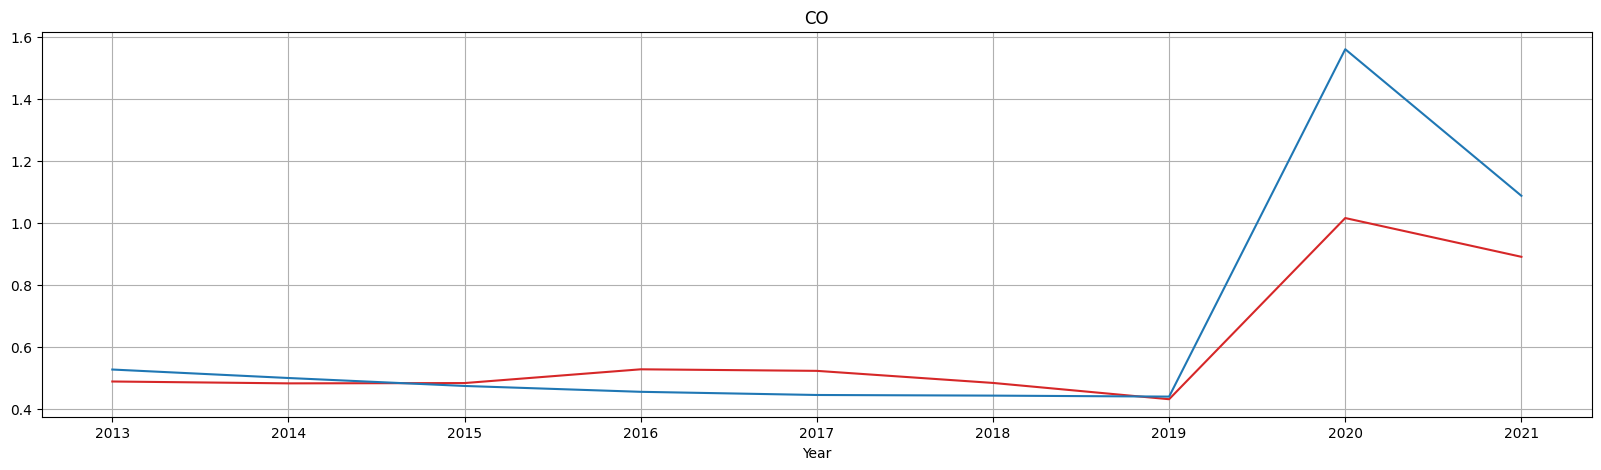

Correlation of punctual value is -0.2968744613286813
Correlation of rolling average value is -0.15948064284425373


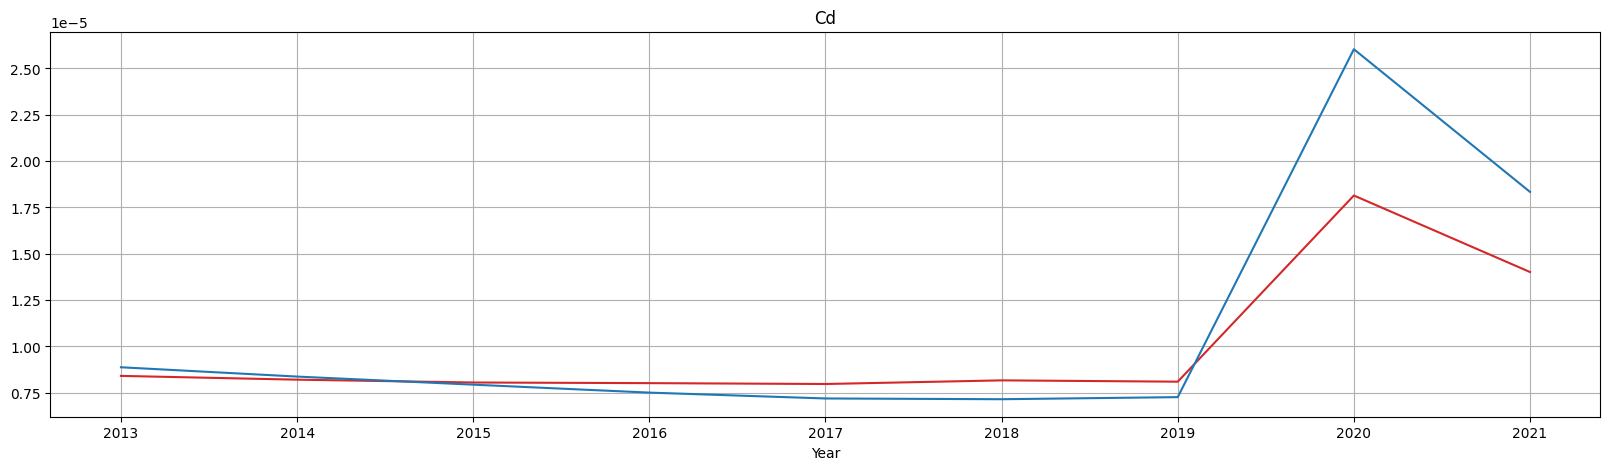

Correlation of punctual value is 0.8091795630349787
Correlation of rolling average value is 0.9188441600746368


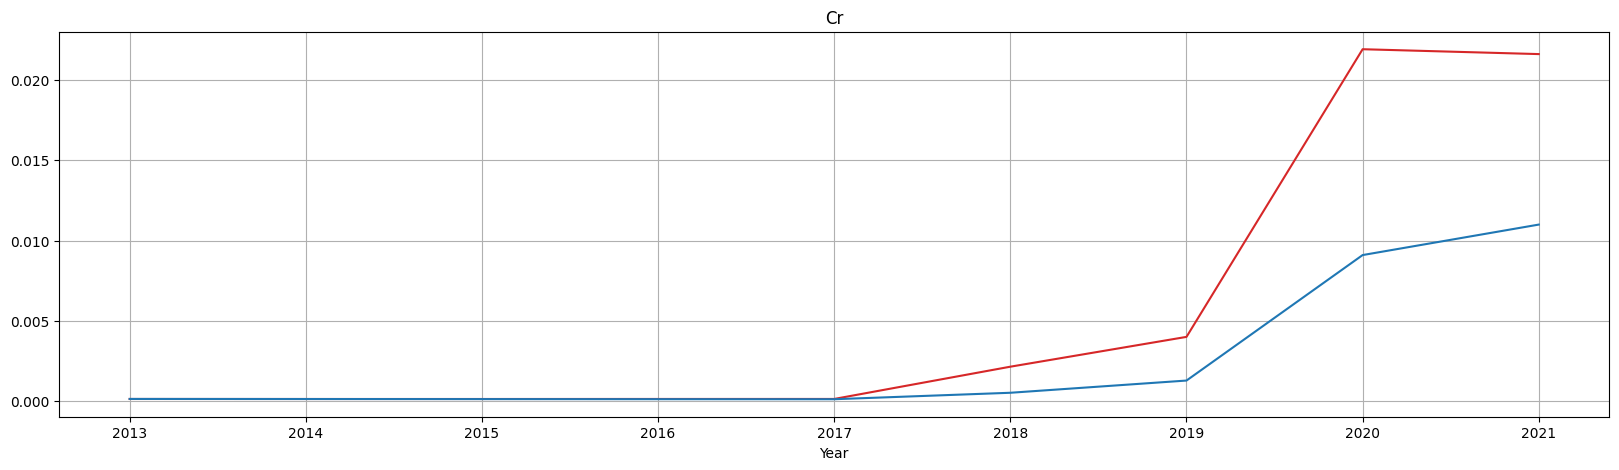

Correlation of punctual value is 0.5463996338152796
Correlation of rolling average value is 0.5390386545347086


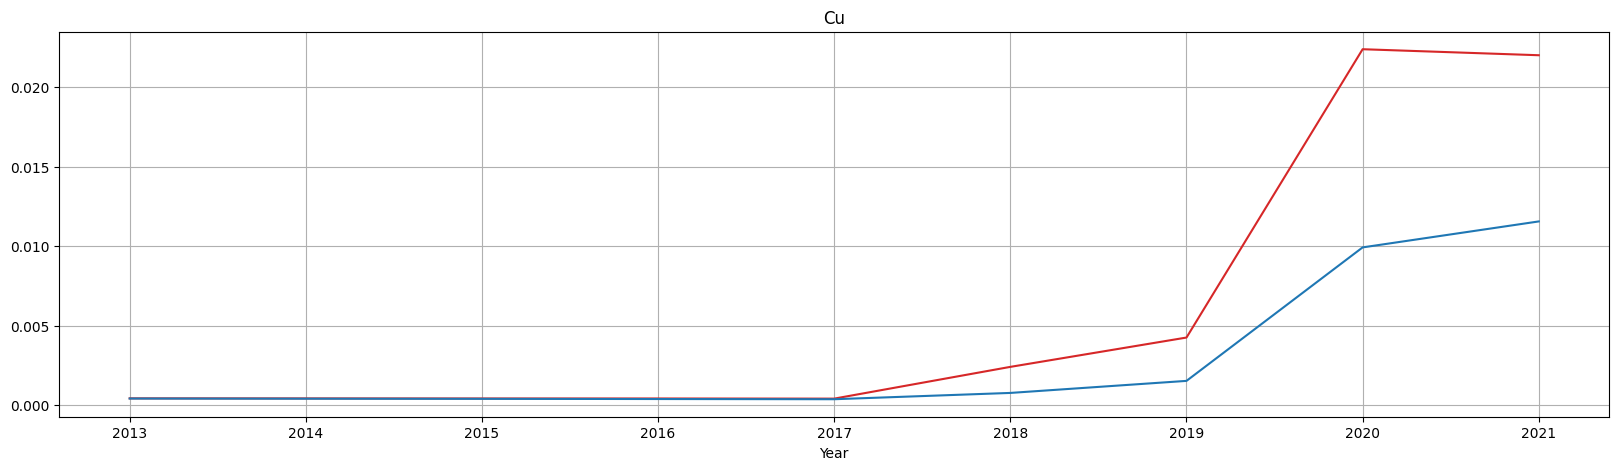

Correlation of punctual value is 0.566120729510821
Correlation of rolling average value is 0.5717535852425097


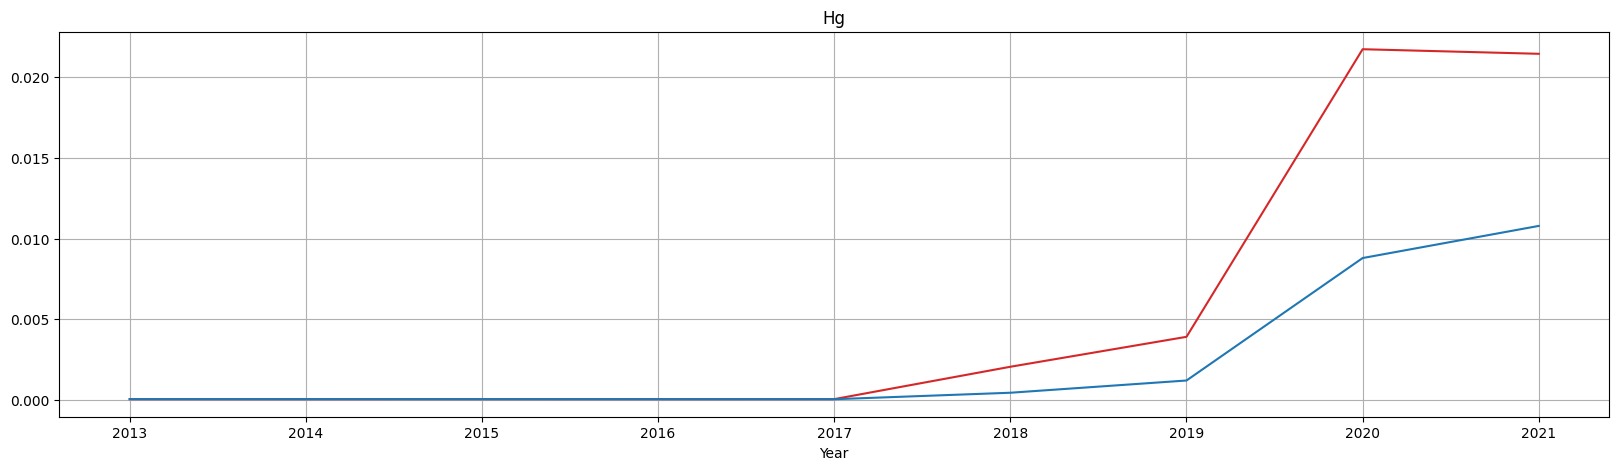

Correlation of punctual value is 0.5385122417118519
Correlation of rolling average value is 0.5252609107658703


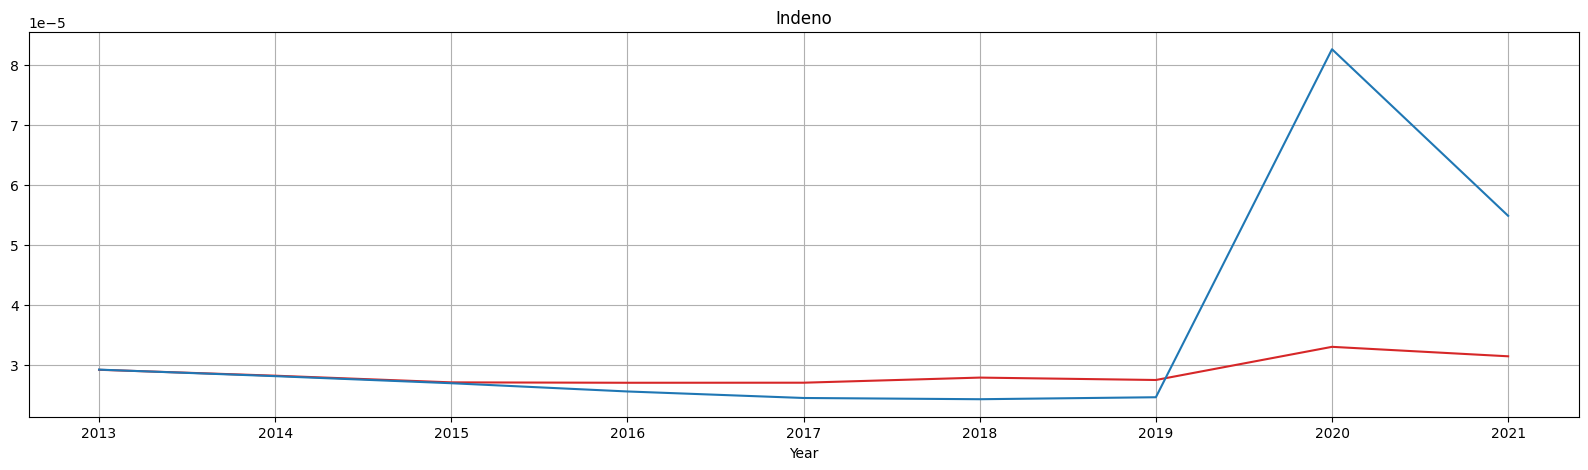

Correlation of punctual value is 0.6662810448568507
Correlation of rolling average value is 0.9577941004728352


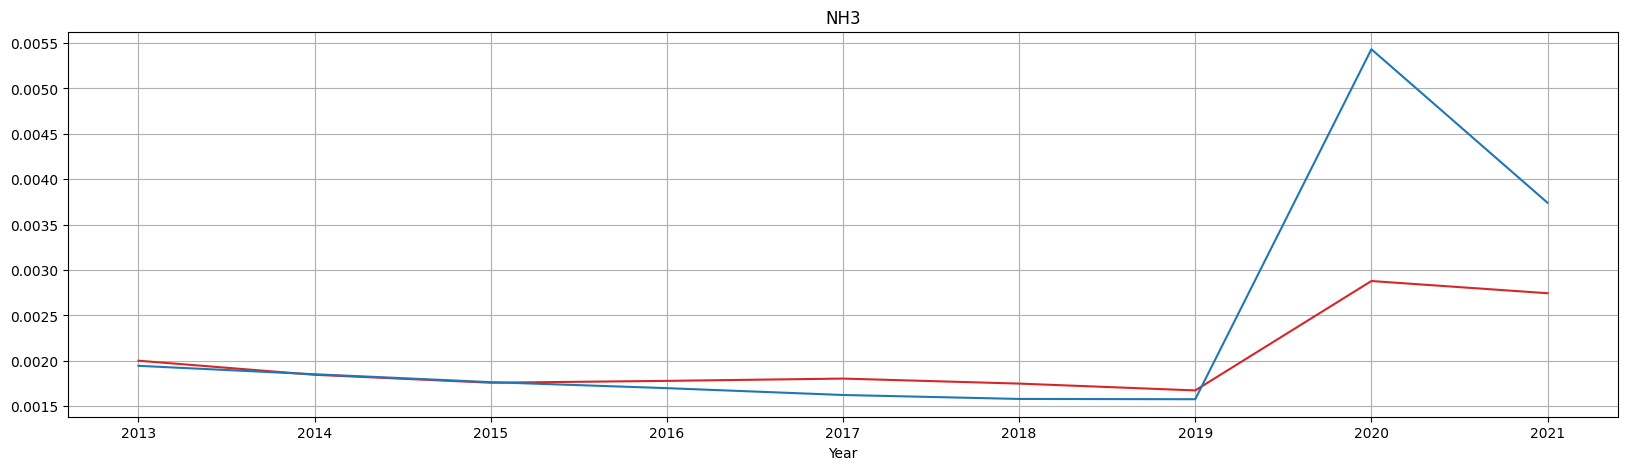

Correlation of punctual value is 0.7216874807280897
Correlation of rolling average value is 0.946063321792824


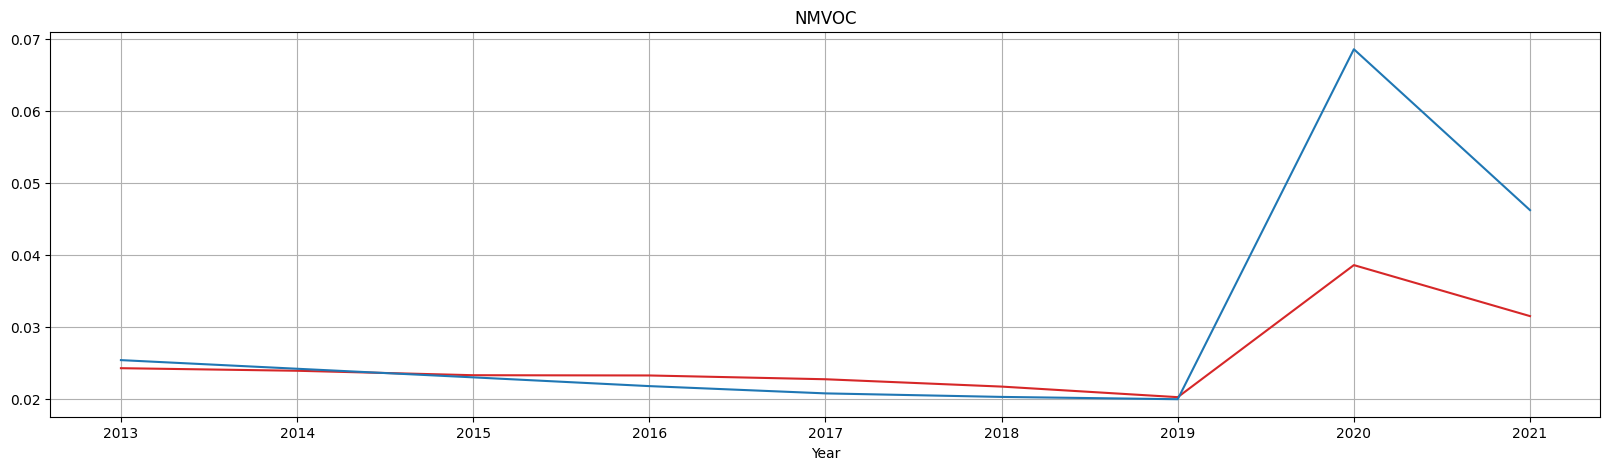

Correlation of punctual value is -0.2344349032597257
Correlation of rolling average value is 0.14709721736986917


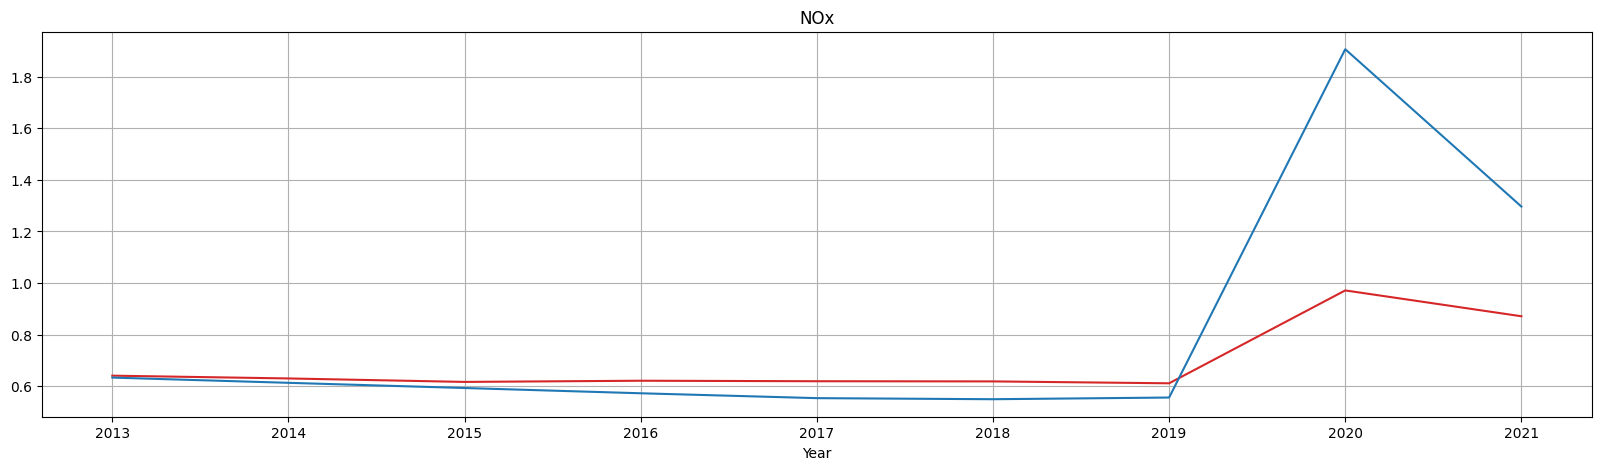

Correlation of punctual value is 0.7527392576457447
Correlation of rolling average value is 0.969350755037444


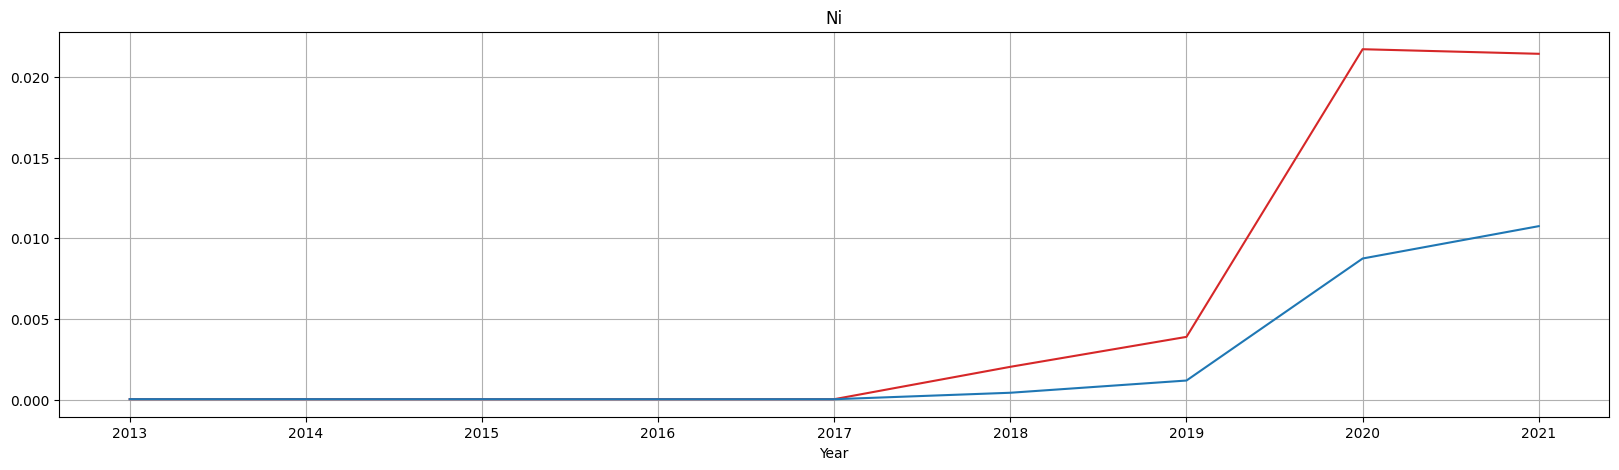

Correlation of punctual value is 0.5374042446314035
Correlation of rolling average value is 0.5232540992333792


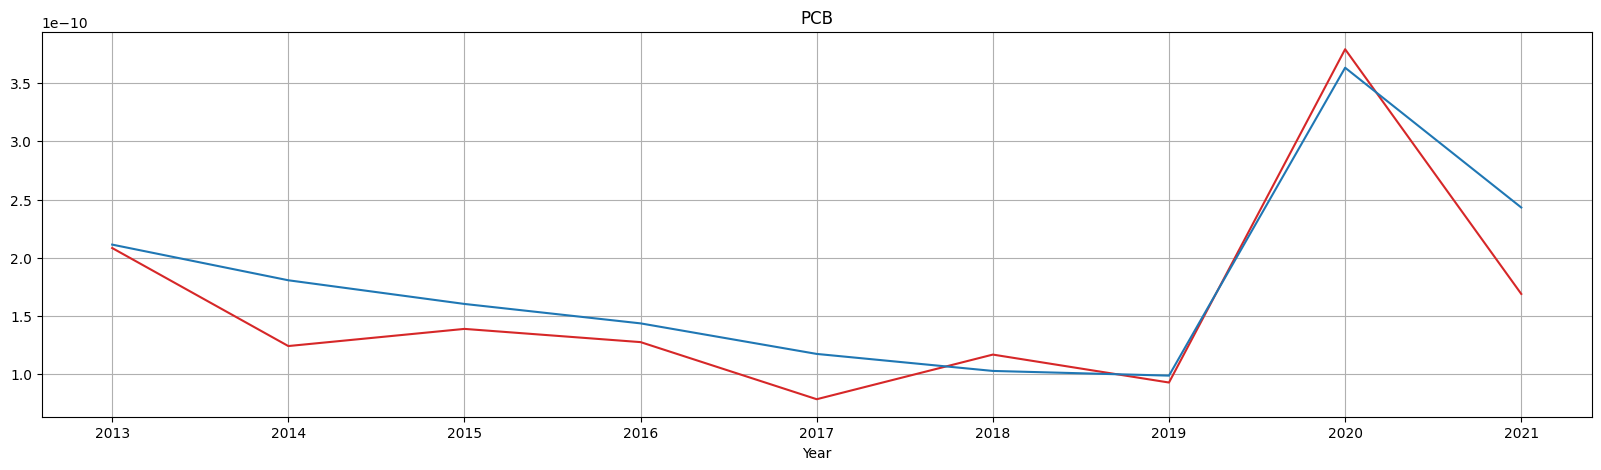

Correlation of punctual value is -0.9706878300743992
Correlation of rolling average value is -0.9880302018088353


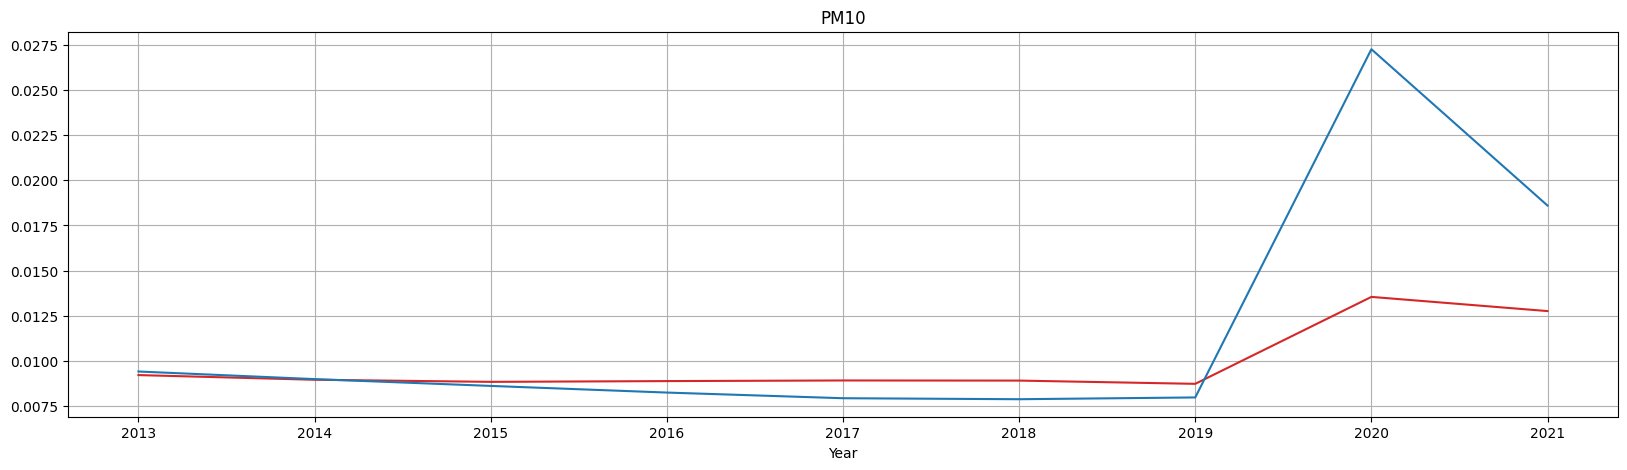

Correlation of punctual value is 0.6042600540848166
Correlation of rolling average value is 0.9232587490084962


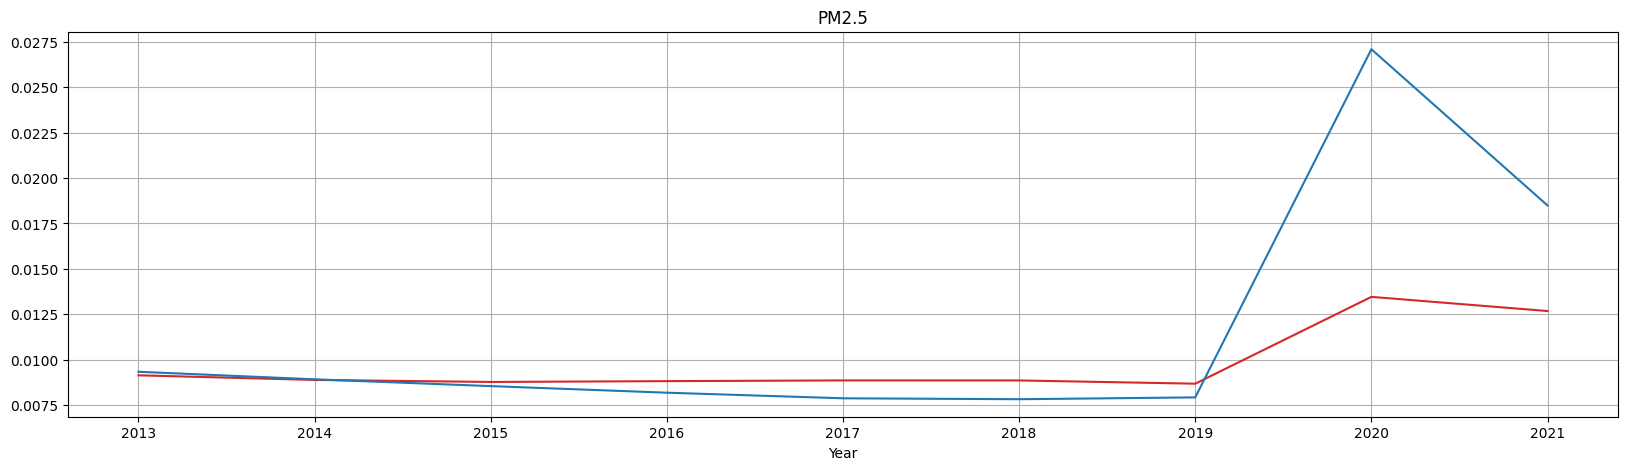

Correlation of punctual value is 0.608227554595619
Correlation of rolling average value is 0.9250148129300738


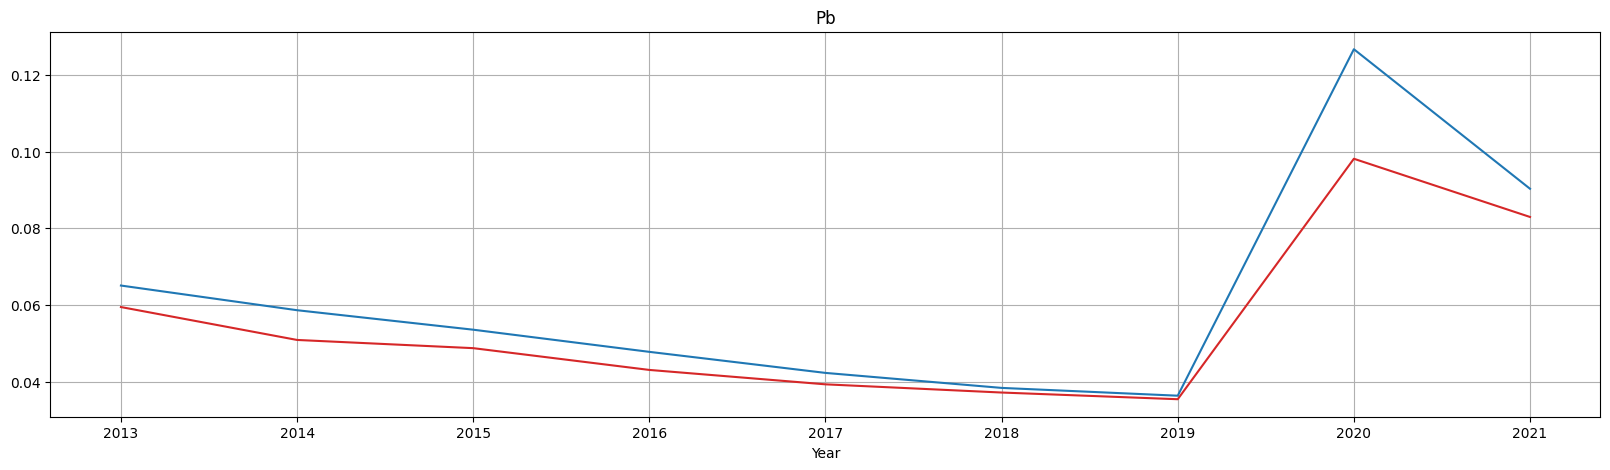

Correlation of punctual value is -0.7148702035883355
Correlation of rolling average value is -0.8816300015678561


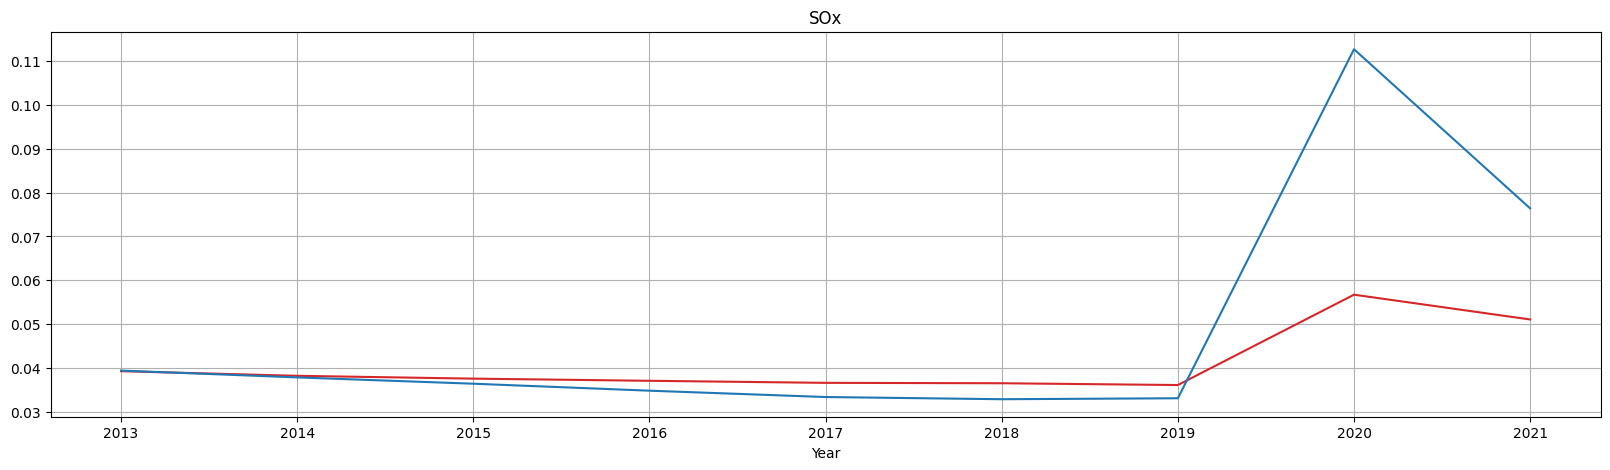

Correlation of punctual value is 0.6655277024950009
Correlation of rolling average value is 0.9359319696530224


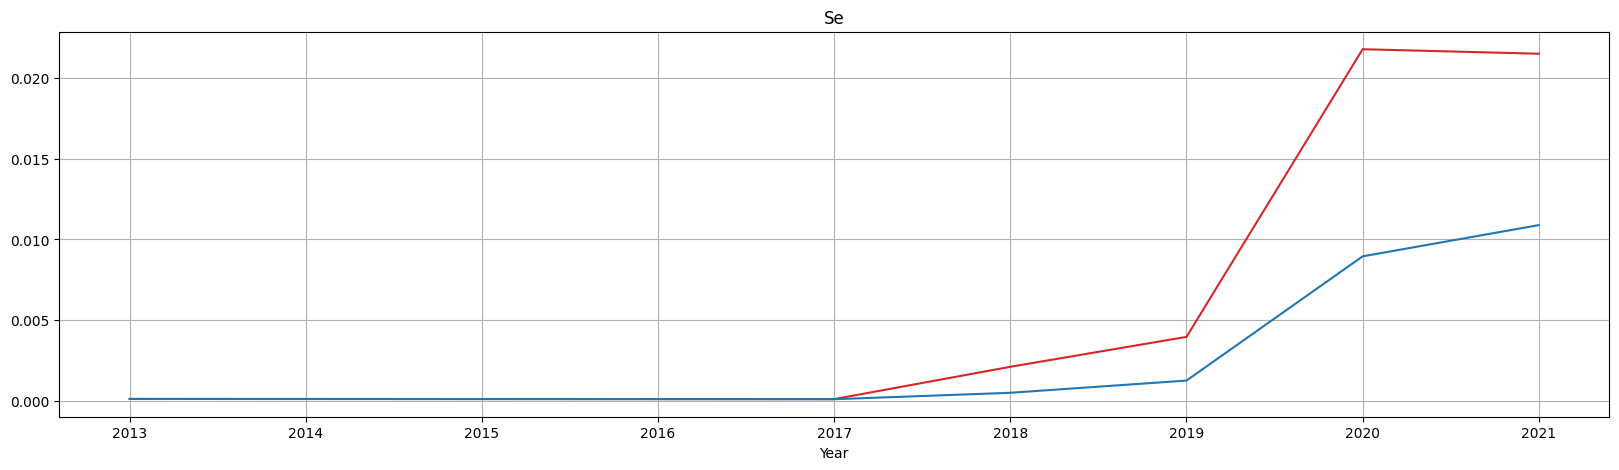

Correlation of punctual value is 0.5436976461101383
Correlation of rolling average value is 0.534736485473151


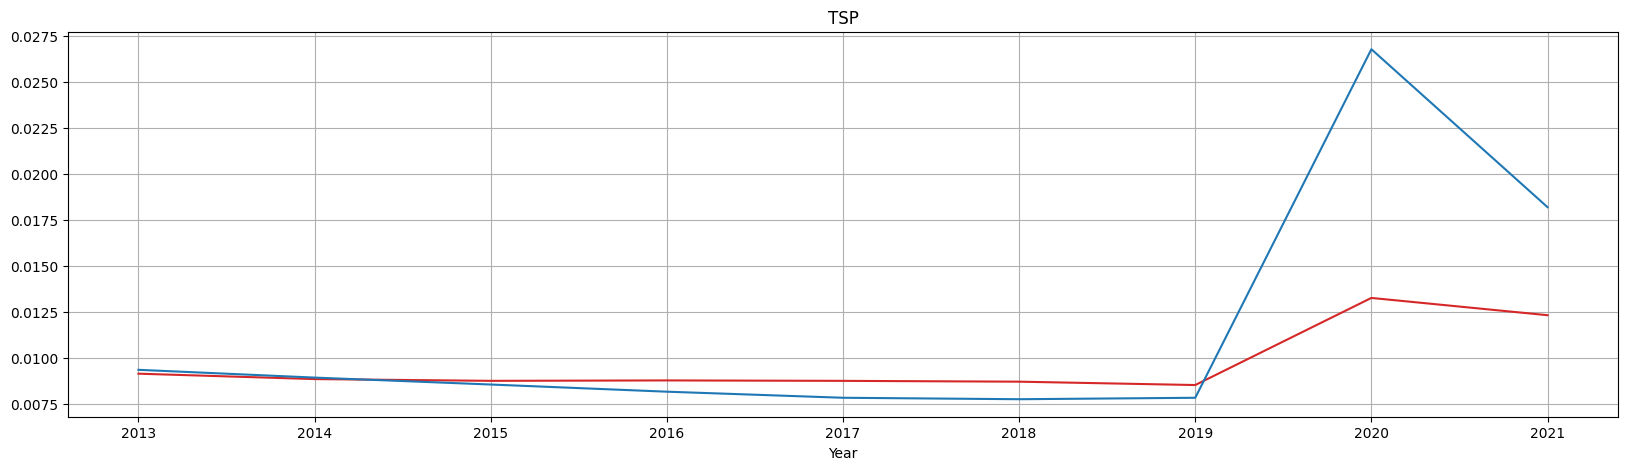

Correlation of punctual value is 0.5905567244705884
Correlation of rolling average value is 0.91329504078873


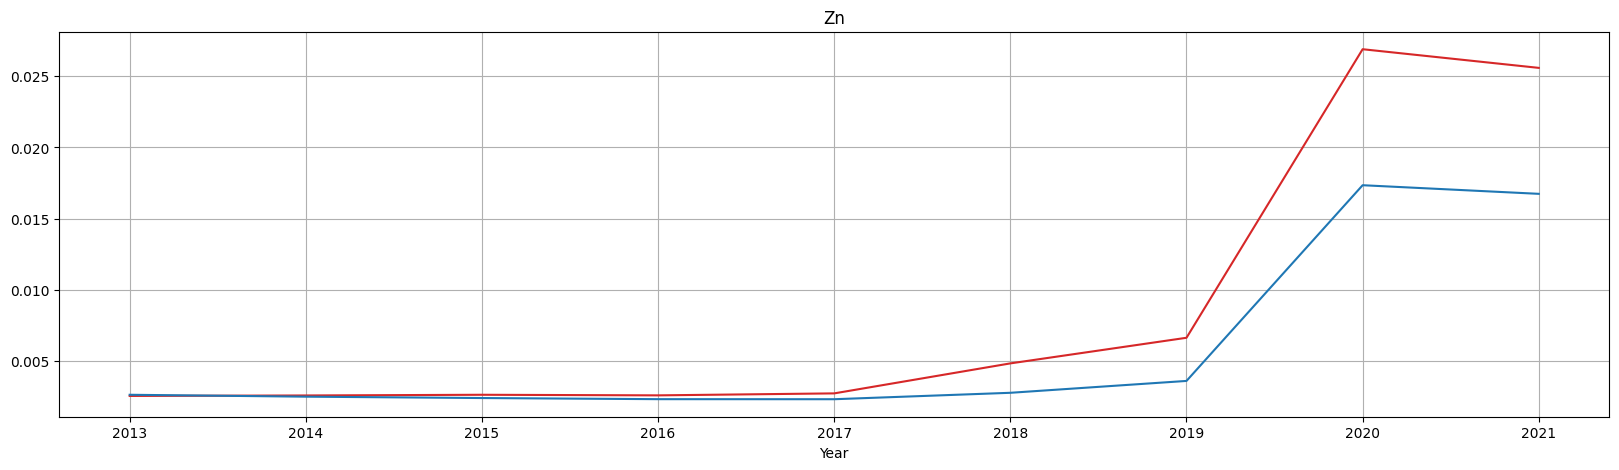

Correlation of punctual value is 0.7105851247967115
Correlation of rolling average value is 0.7724749686512282


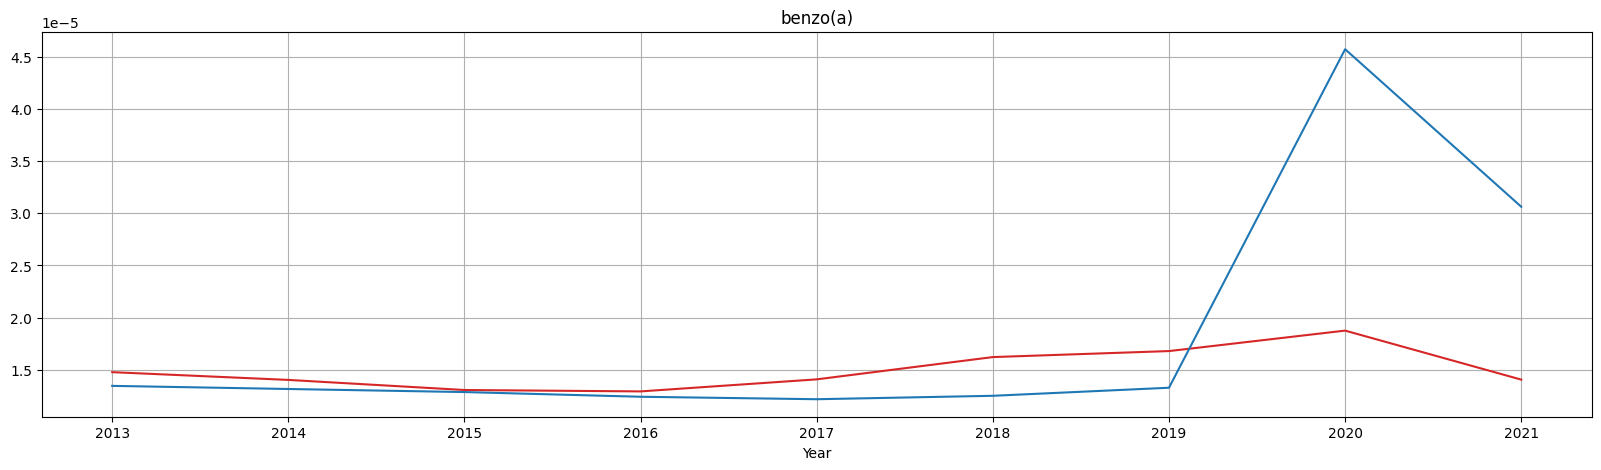

Correlation of punctual value is 0.4710287918054708
Correlation of rolling average value is 0.9223939387084303


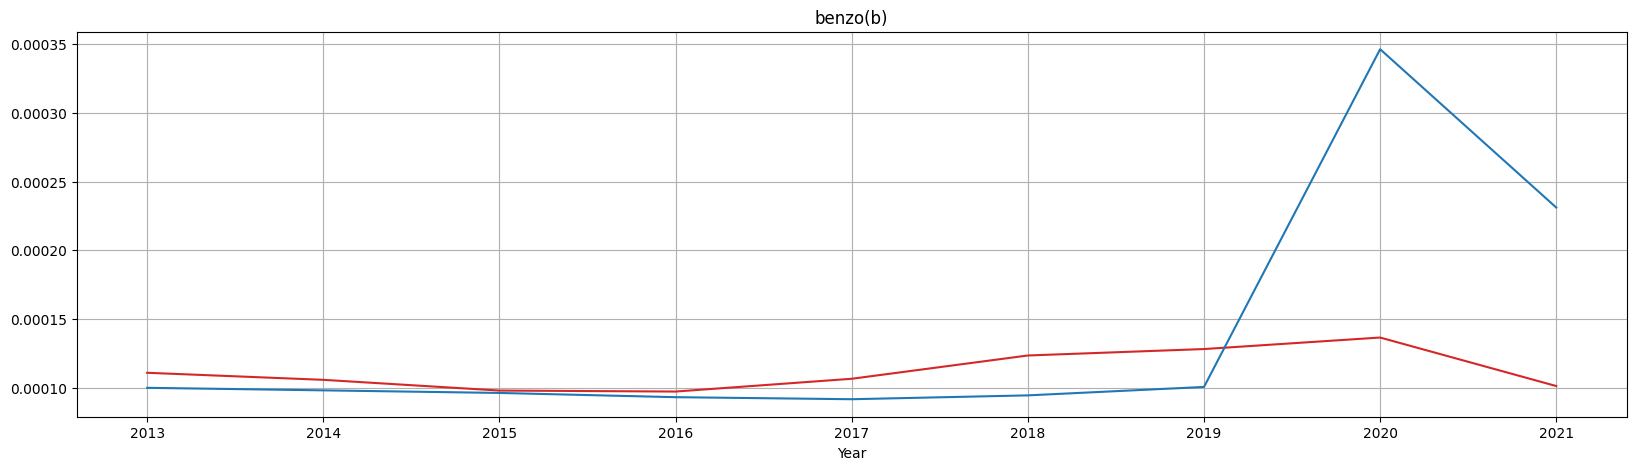

Correlation of punctual value is 0.485942225387475
Correlation of rolling average value is 0.9195034099036098


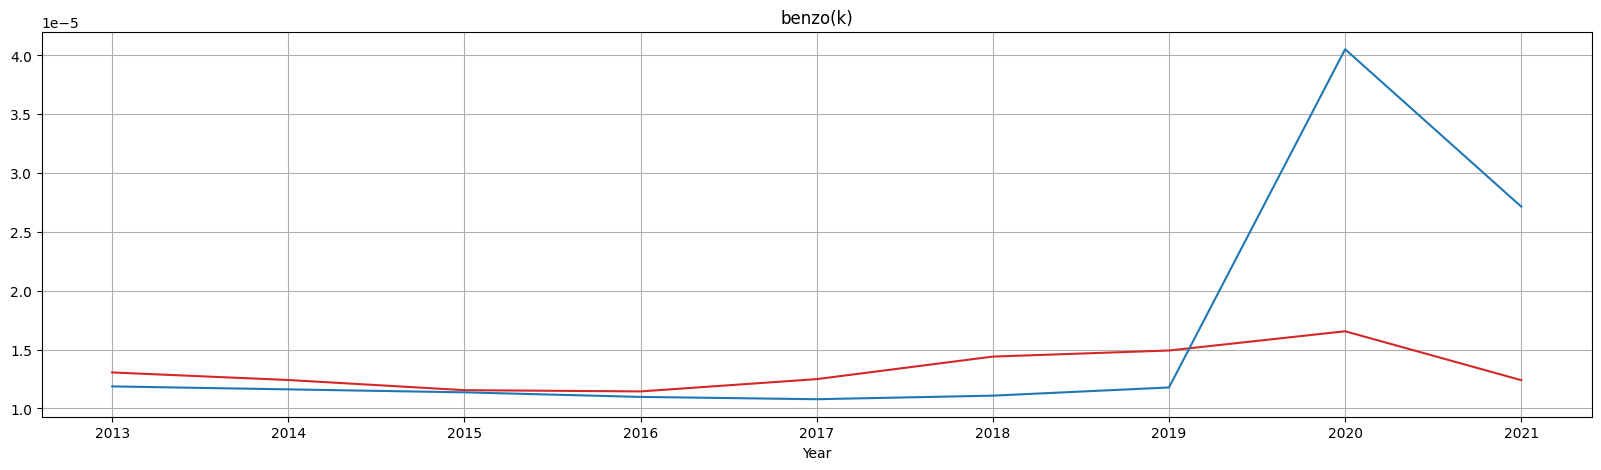

Correlation of punctual value is 0.4825547871326938
Correlation of rolling average value is 0.9241839961379267


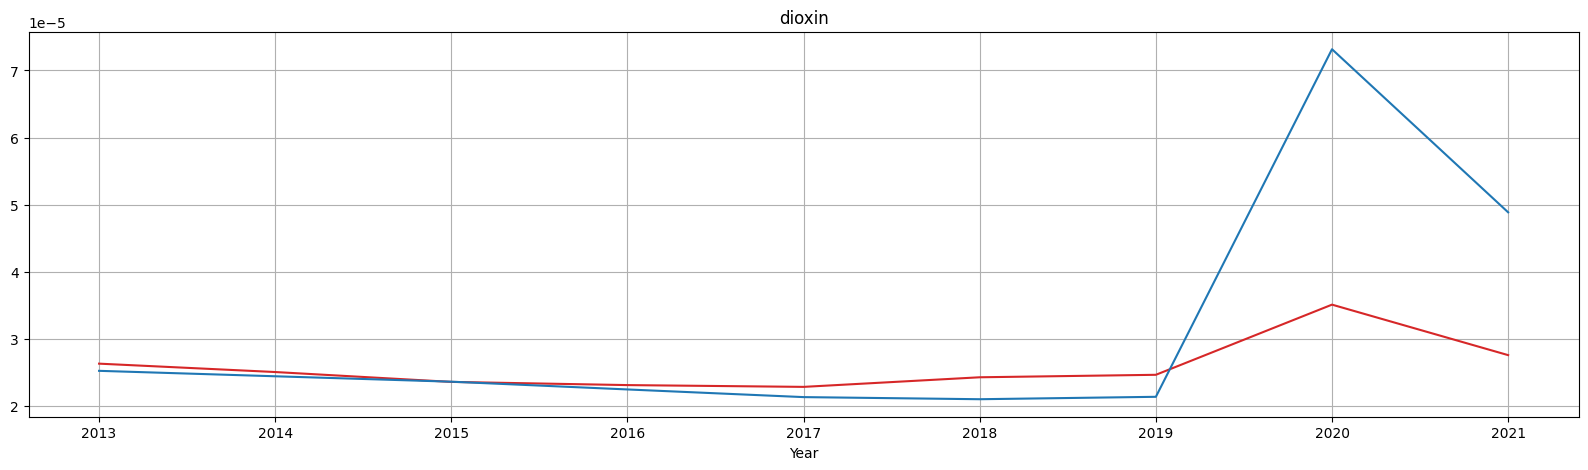

Correlation of punctual value is 0.38888464689991725
Correlation of rolling average value is 0.8857130894262771


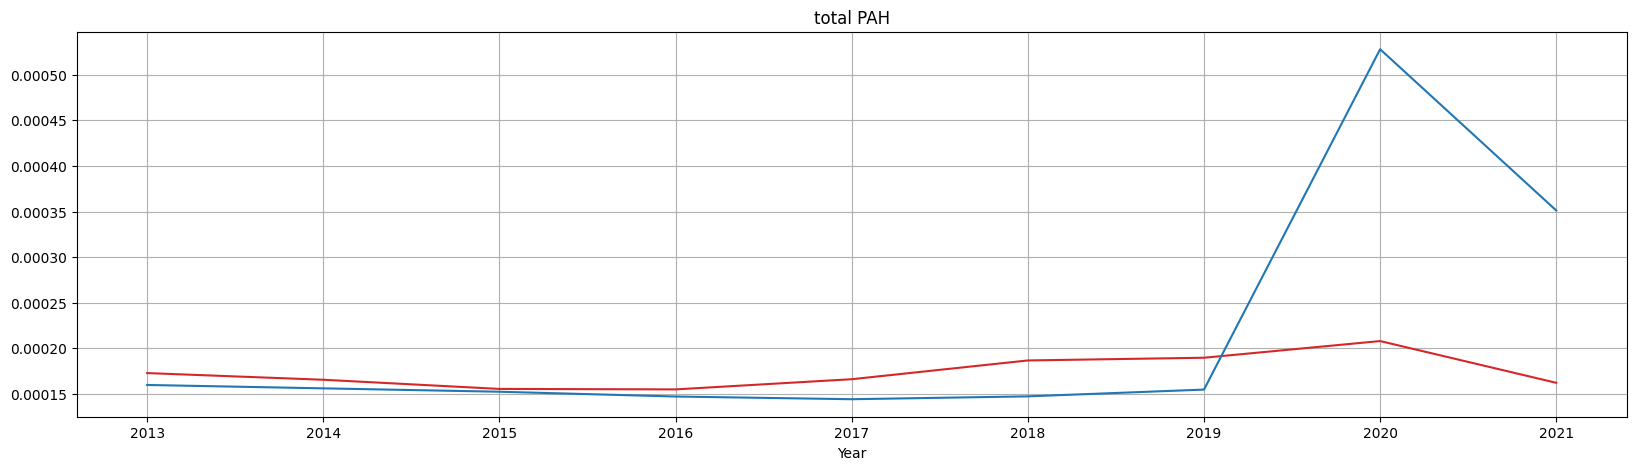

Correlation of punctual value is 0.533373787754153
Correlation of rolling average value is 0.941712045275388


In [34]:
for x in pollutants:
    fig, ax1 = plt.subplots(figsize=(20,5))
    plt.title(x) 

    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.plot(df_EU27_emissions_proCapita['Year'], df_EU27_emissions_proCapita[x],color=color) 
    
    
    color = 'tab:blue'
    ax1.plot(df_EU27_emissions_proCapita['Year'], df_EU27_emissions_proCapita['rolling_'+x],color=color) 
    
    plt.grid()
    plt.show() 
    print('Correlation of punctual value is {0}'.format(df_EU27_emissions_proCapita_CORR[x]))
    print('Correlation of rolling average value is {0}'.format(df_EU27_emissions_proCapita_CORR['rolling_'+x]))